<a href="https://colab.research.google.com/github/nadasimre/OpticalFlowTests/blob/main/OpticalFlowEXR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install OpenEXR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for OpenEXR: filename=OpenEXR-1.3.9-cp310-cp310-linux_x86_64.whl size=244854 sha256=08f8df4a71c352755d128c67ff92dbe11d567d2ff7e0a91b1fac1e1de2fa2bc5
  Stored in directory: /root/.cache/pip/wheels/e0/8d/4a/192b9aaacfca38b79fda6b07fdde4f9bfcfa813b7ad2eafc55
Successfully built OpenEXR


In [3]:
pip install Imath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import array
import OpenEXR
import Imath
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def exr2flow(exr, w,h):
  file = OpenEXR.InputFile(exr)

  # Compute the size
  dw = file.header()['dataWindow']
  sz = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)

  FLOAT = Imath.PixelType(Imath.PixelType.FLOAT)
  (R,G,B) = [array.array('f', file.channel(Chan, FLOAT)).tolist() for Chan in ("R", "G", "B") ]
  
  #img contains the x/y-offsets in pixels
  img = np.zeros((h,w,3), np.float64)
  img[:,:,0] = np.array(R).reshape(img.shape[0],-1)
  img[:,:,1] = -np.array(G).reshape(img.shape[0],-1)


  hsv = np.zeros((h,w,3), np.uint8)
  hsv[...,1] = 255

  #by using opencvs cartToPolar-function we can calculate magnitude (absolute offset) and according angles for each pixels.
  mag, ang = cv2.cartToPolar(img[...,0], img[...,1])

  #Finally, we can convert everything to a nice-looking color-image by first using the HSV (hue, saturation, value) colorspace, setting the hue to the angle, saturation to full, and the value to the magnitude
  hsv[...,0] = ang*180/np.pi/2
  hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
  bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

  return img, bgr, mag,ang

In [31]:
img0, bgr0, mag0, ang0 = exr2flow("images/Speed0000.exr", 1920, 1080)
img1, bgr1, mag1, ang1 = exr2flow("images/Speed0001.exr", 1920, 1080)
img2, bgr2, mag2, ang2 = exr2flow("images/Speed0002.exr", 1920, 1080)
img3, bgr3, mag3, ang3 = exr2flow("images/Speed0003.exr", 1920, 1080)
img4, bgr4, mag4, ang4 = exr2flow("images/Speed0004.exr", 1920, 1080)
img5, bgr5, mag5, ang5 = exr2flow("images/Speed0005.exr", 1920, 1080)

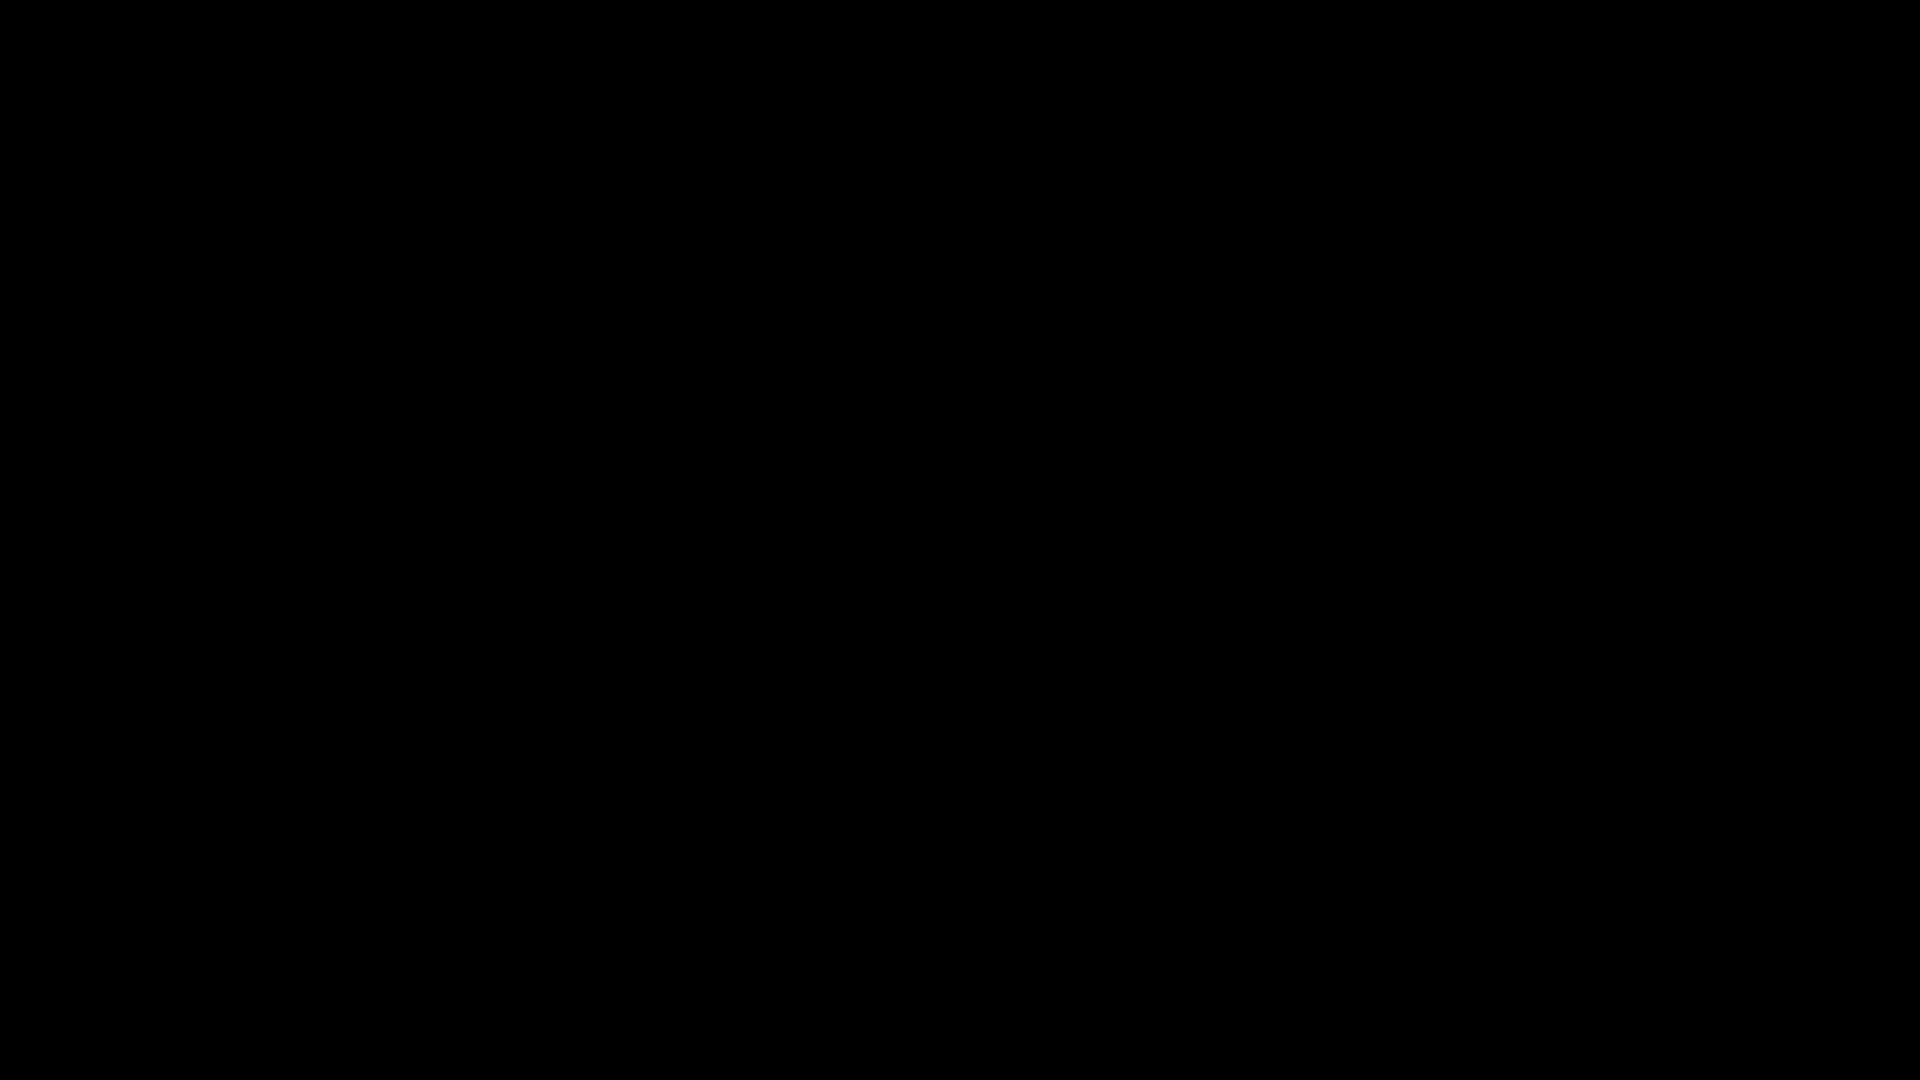

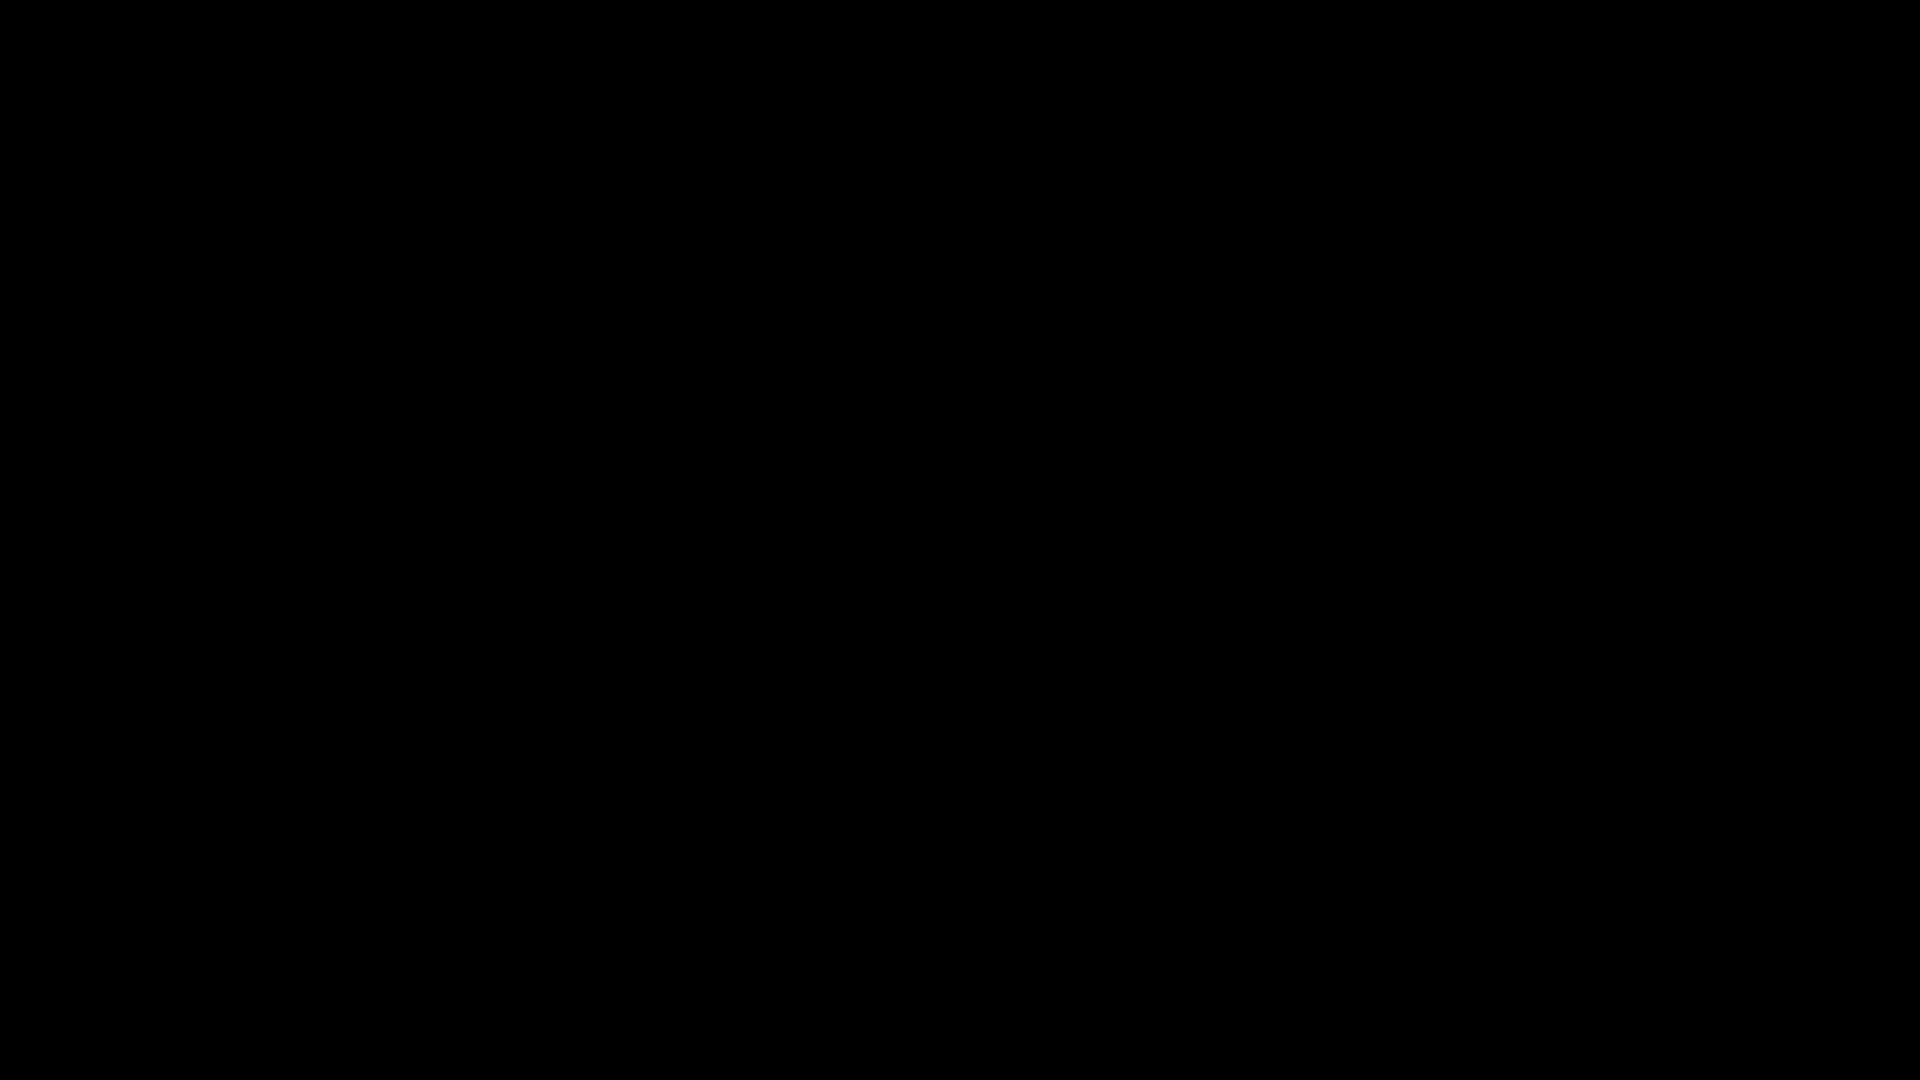

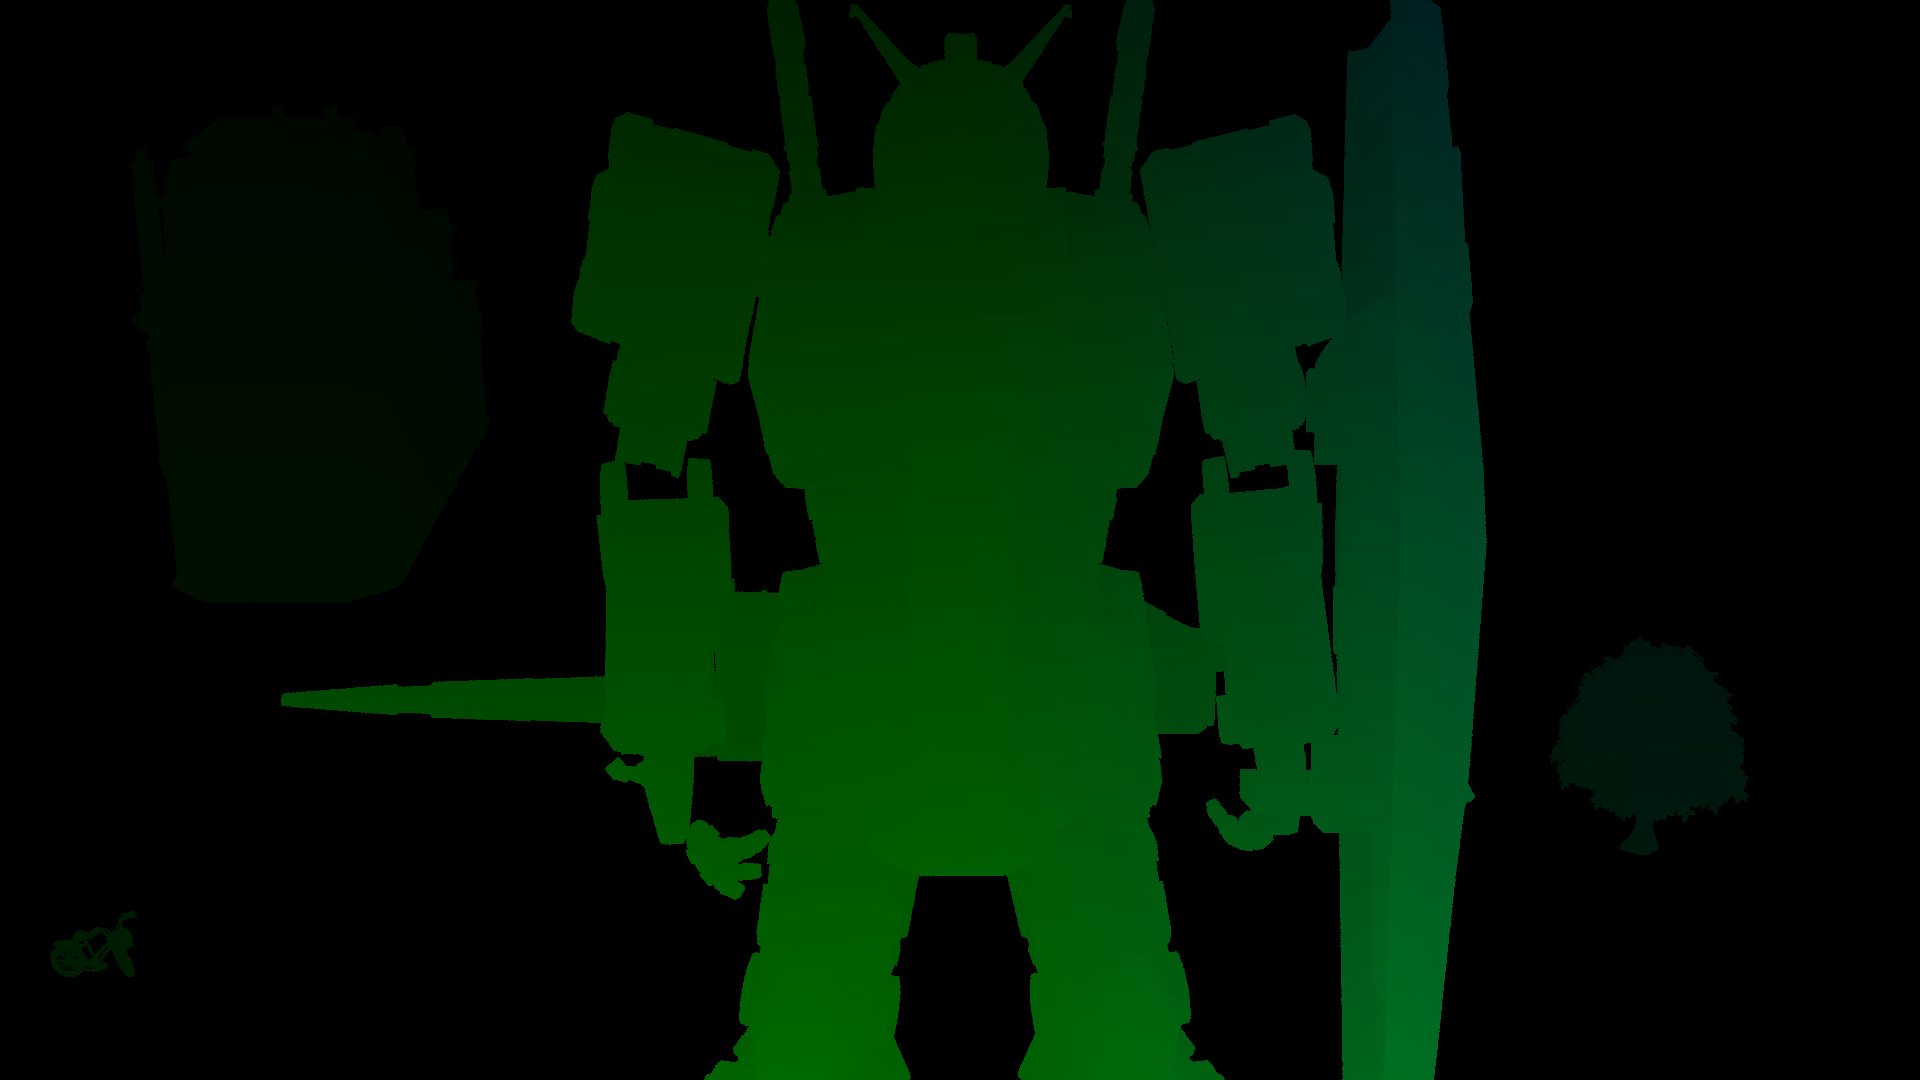

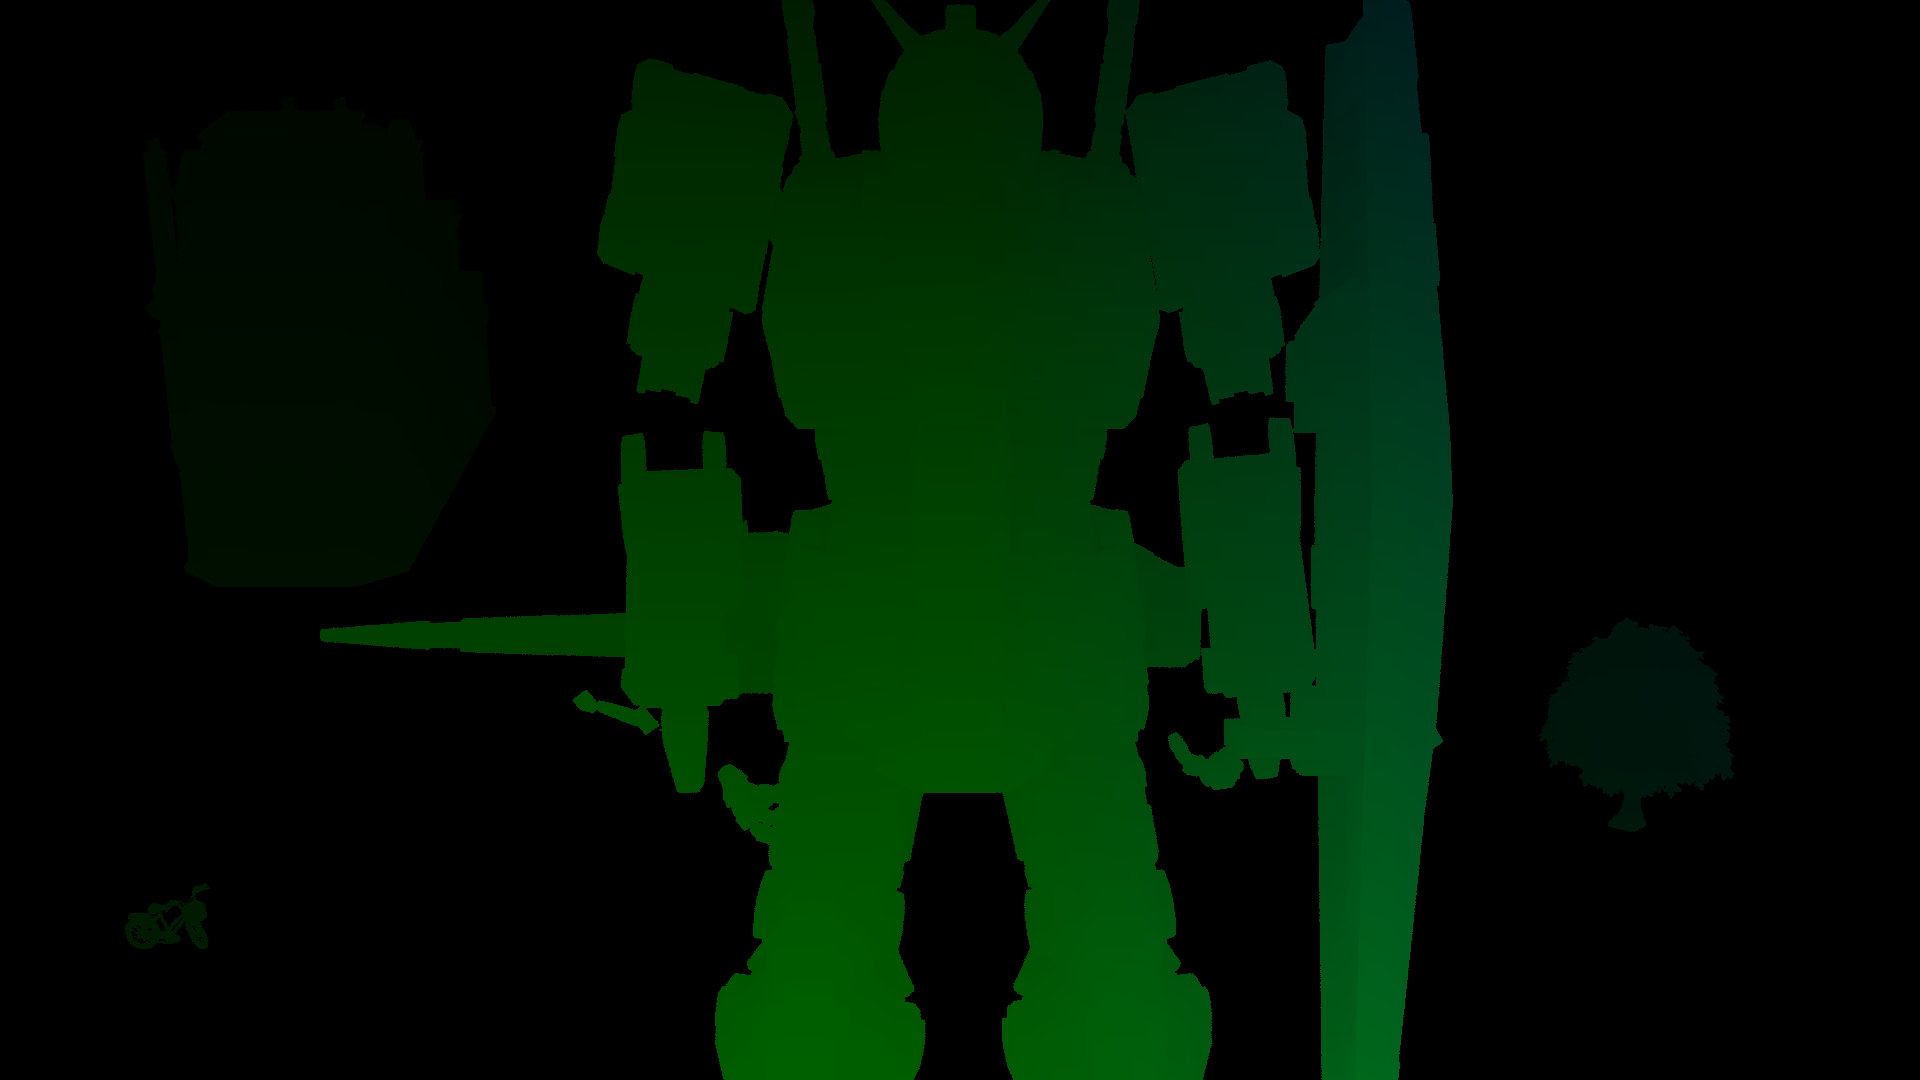

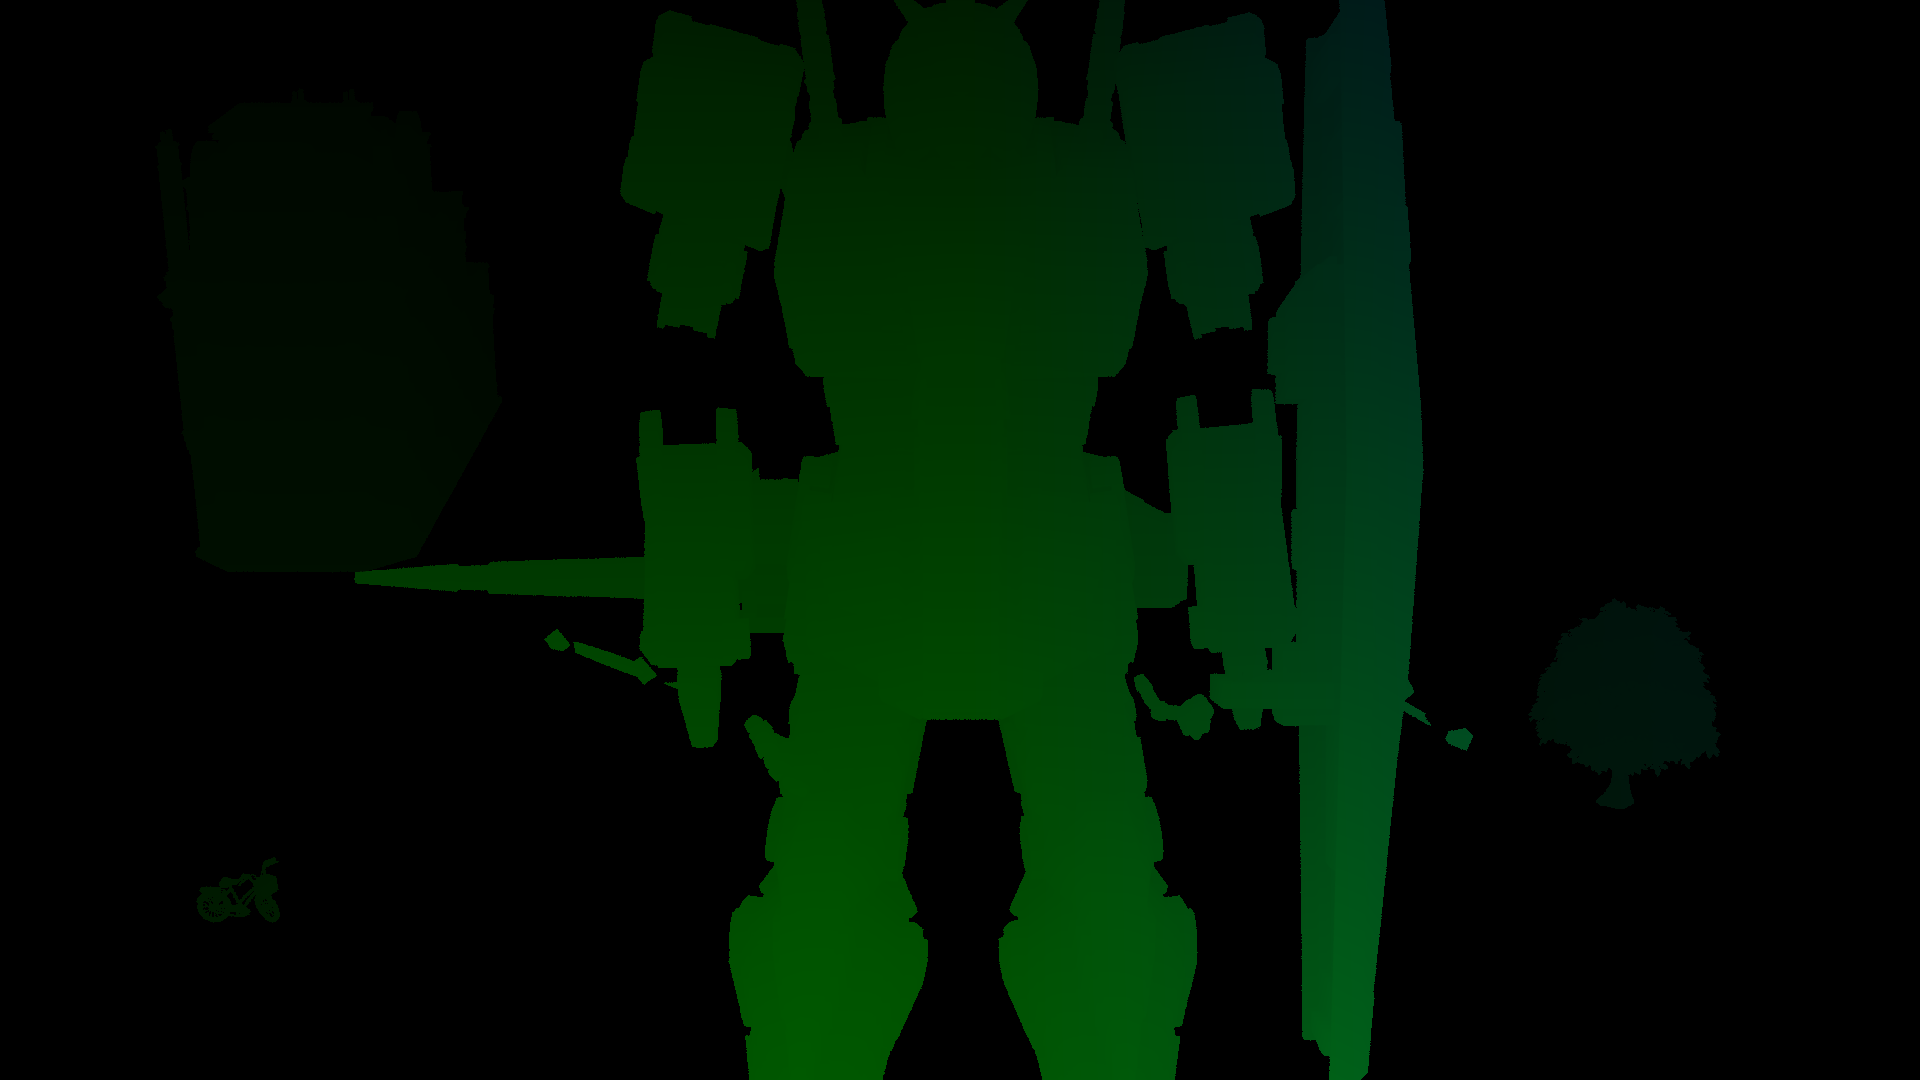

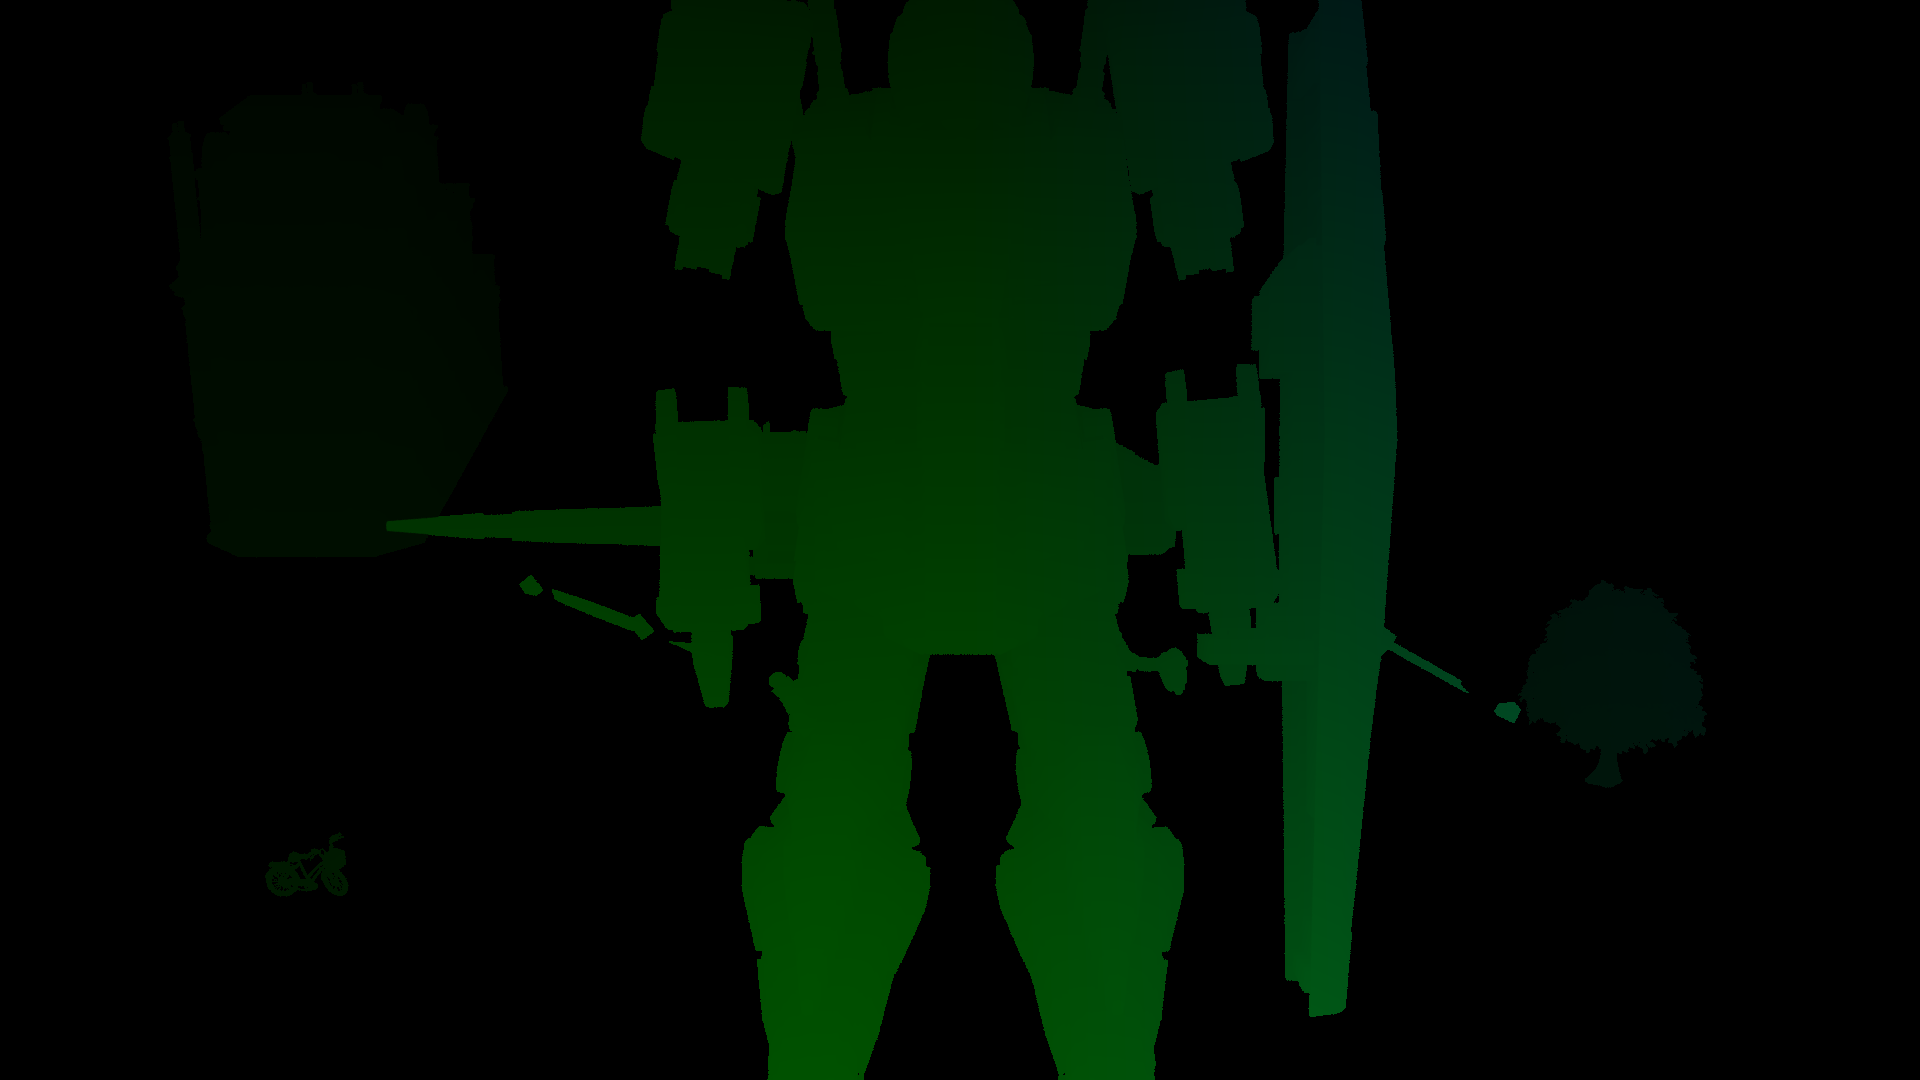

In [27]:
#(contains the x/y-offsets in pixels)
cv2_imshow(img0)
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)
cv2_imshow(img4)
cv2_imshow(img5)

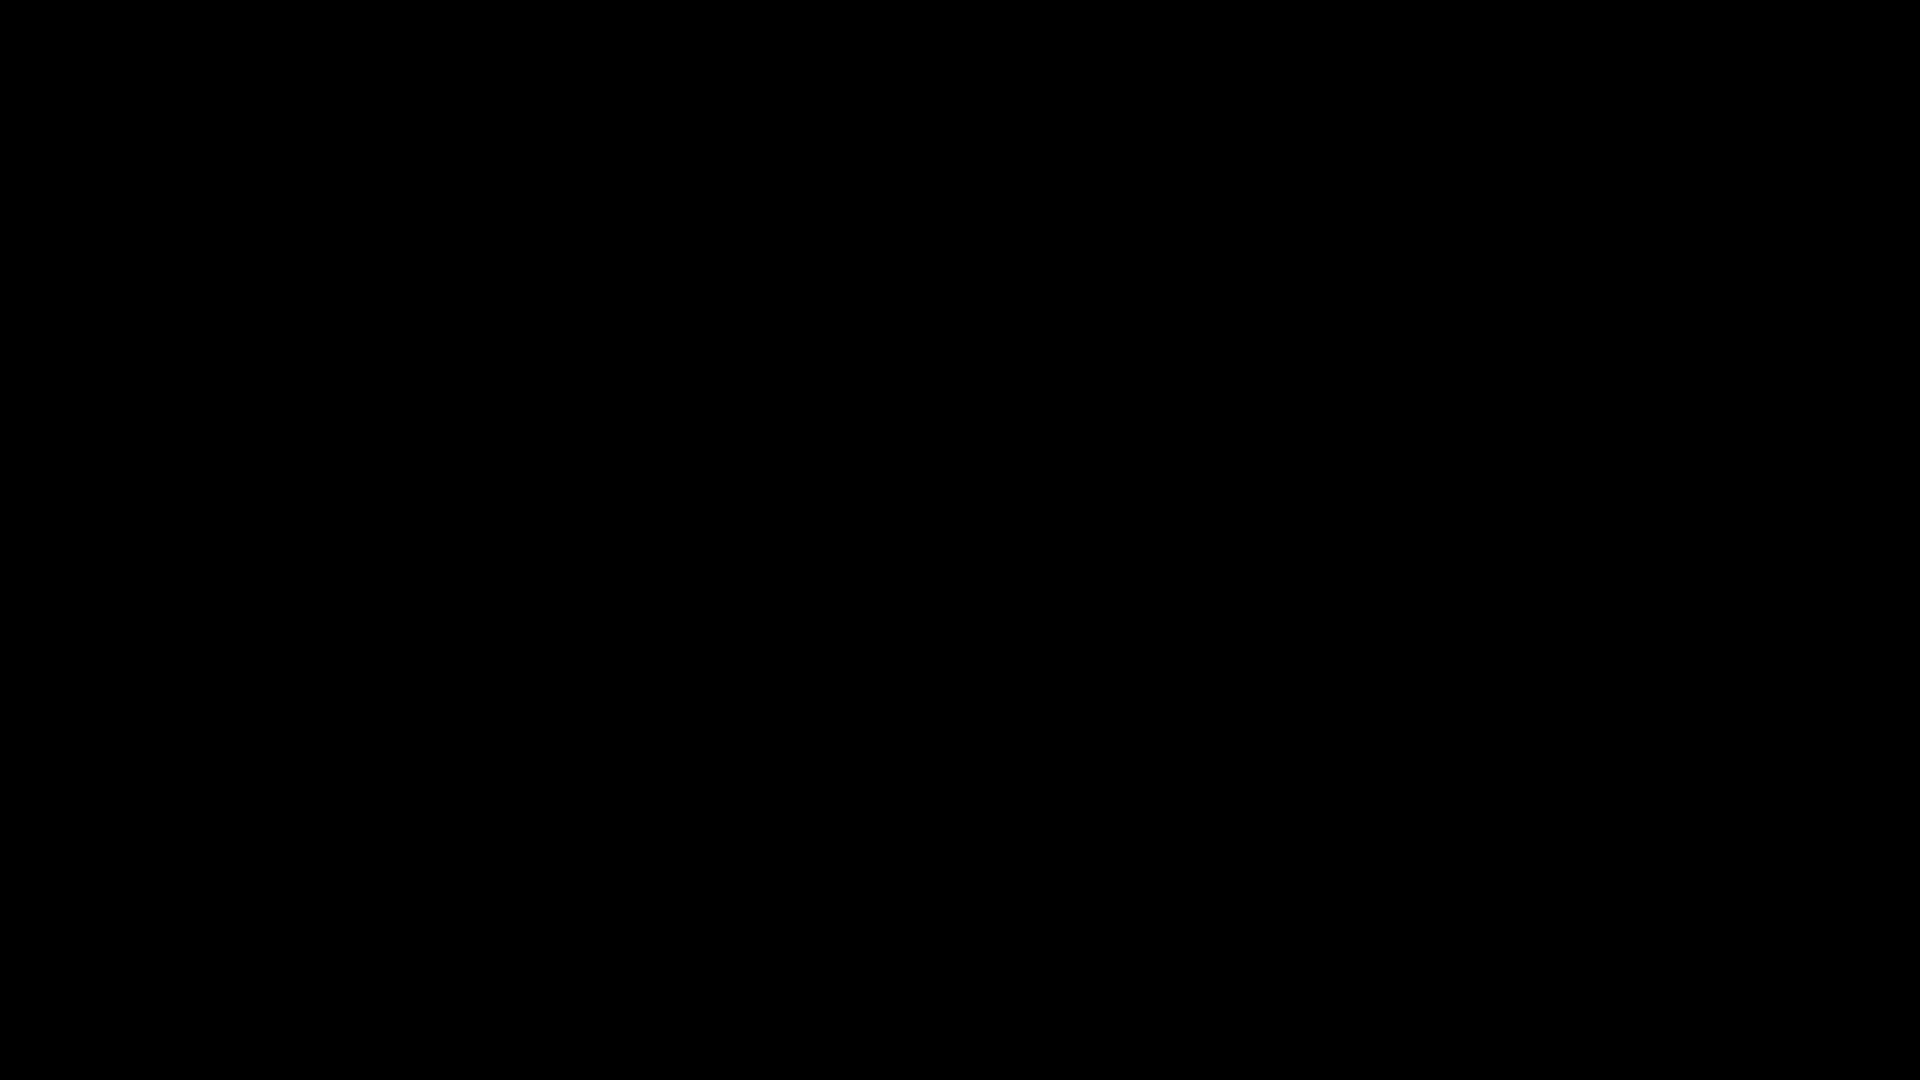

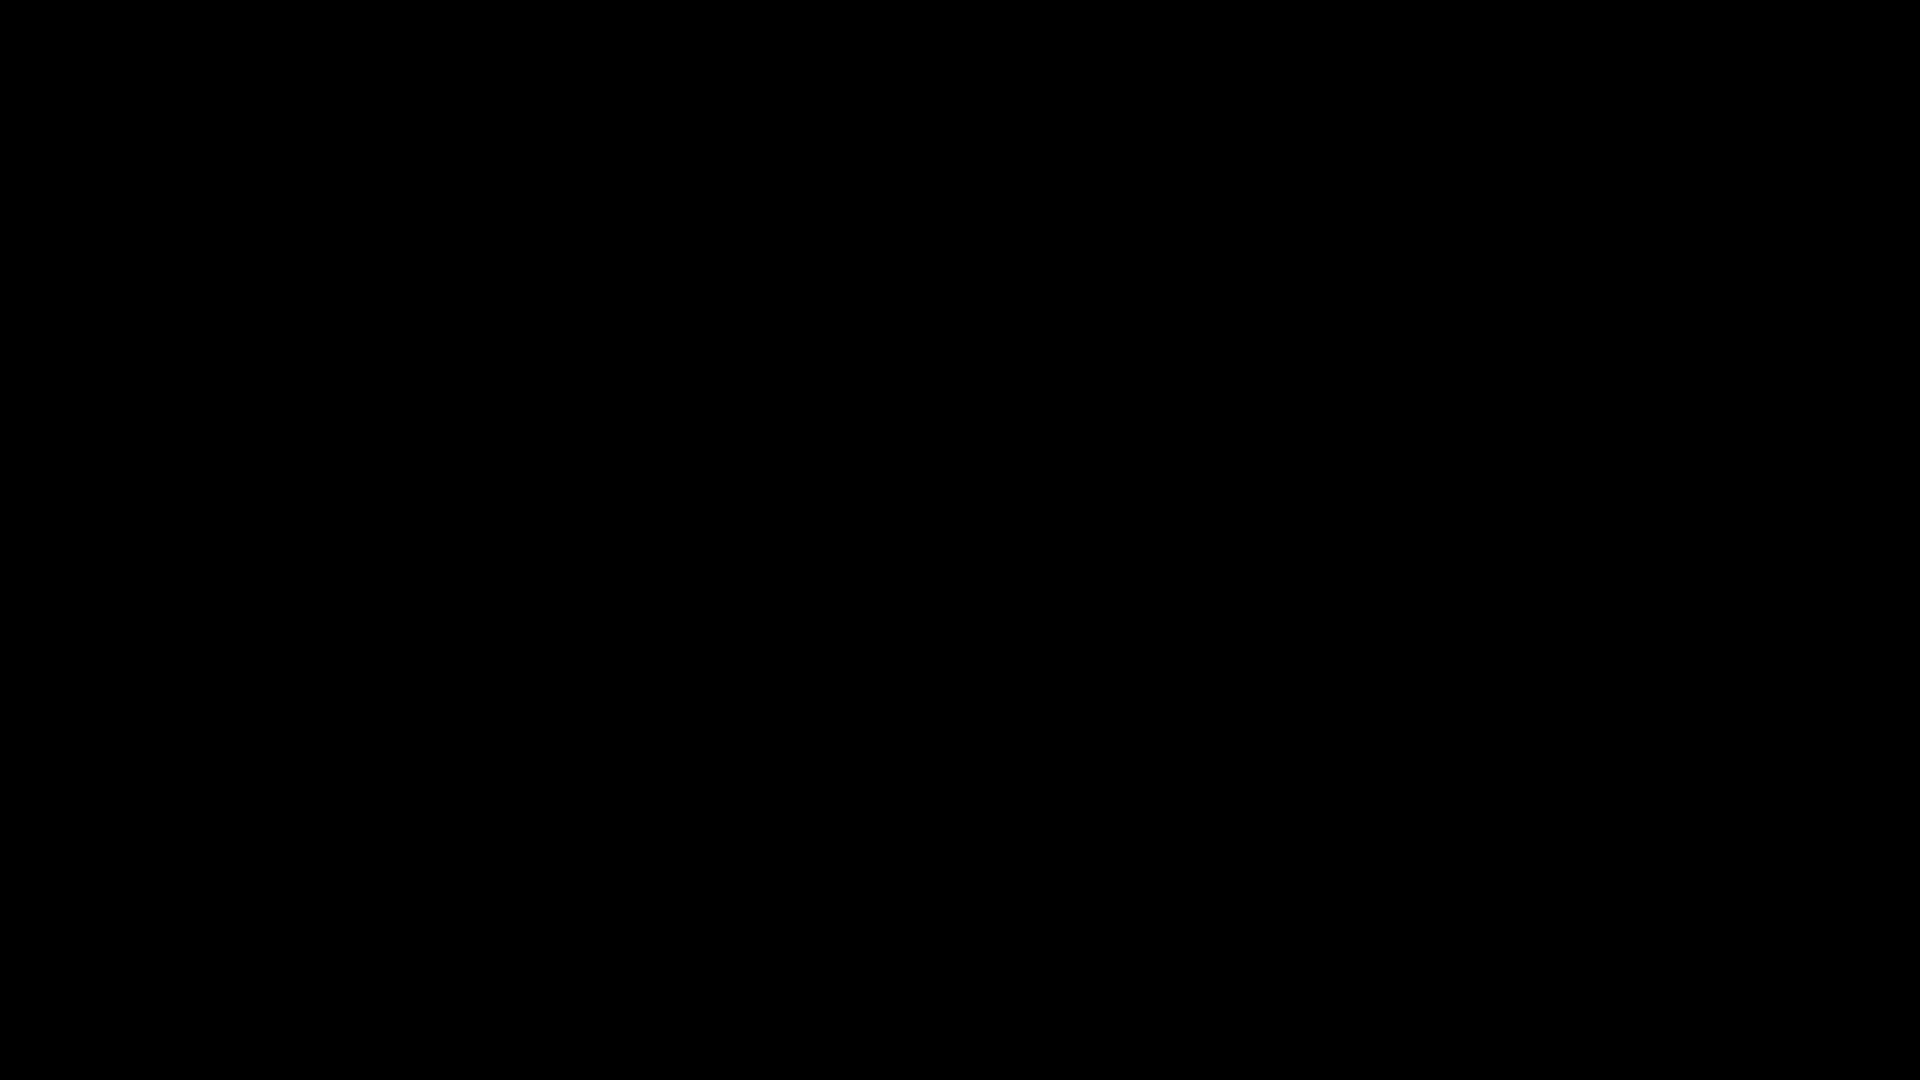

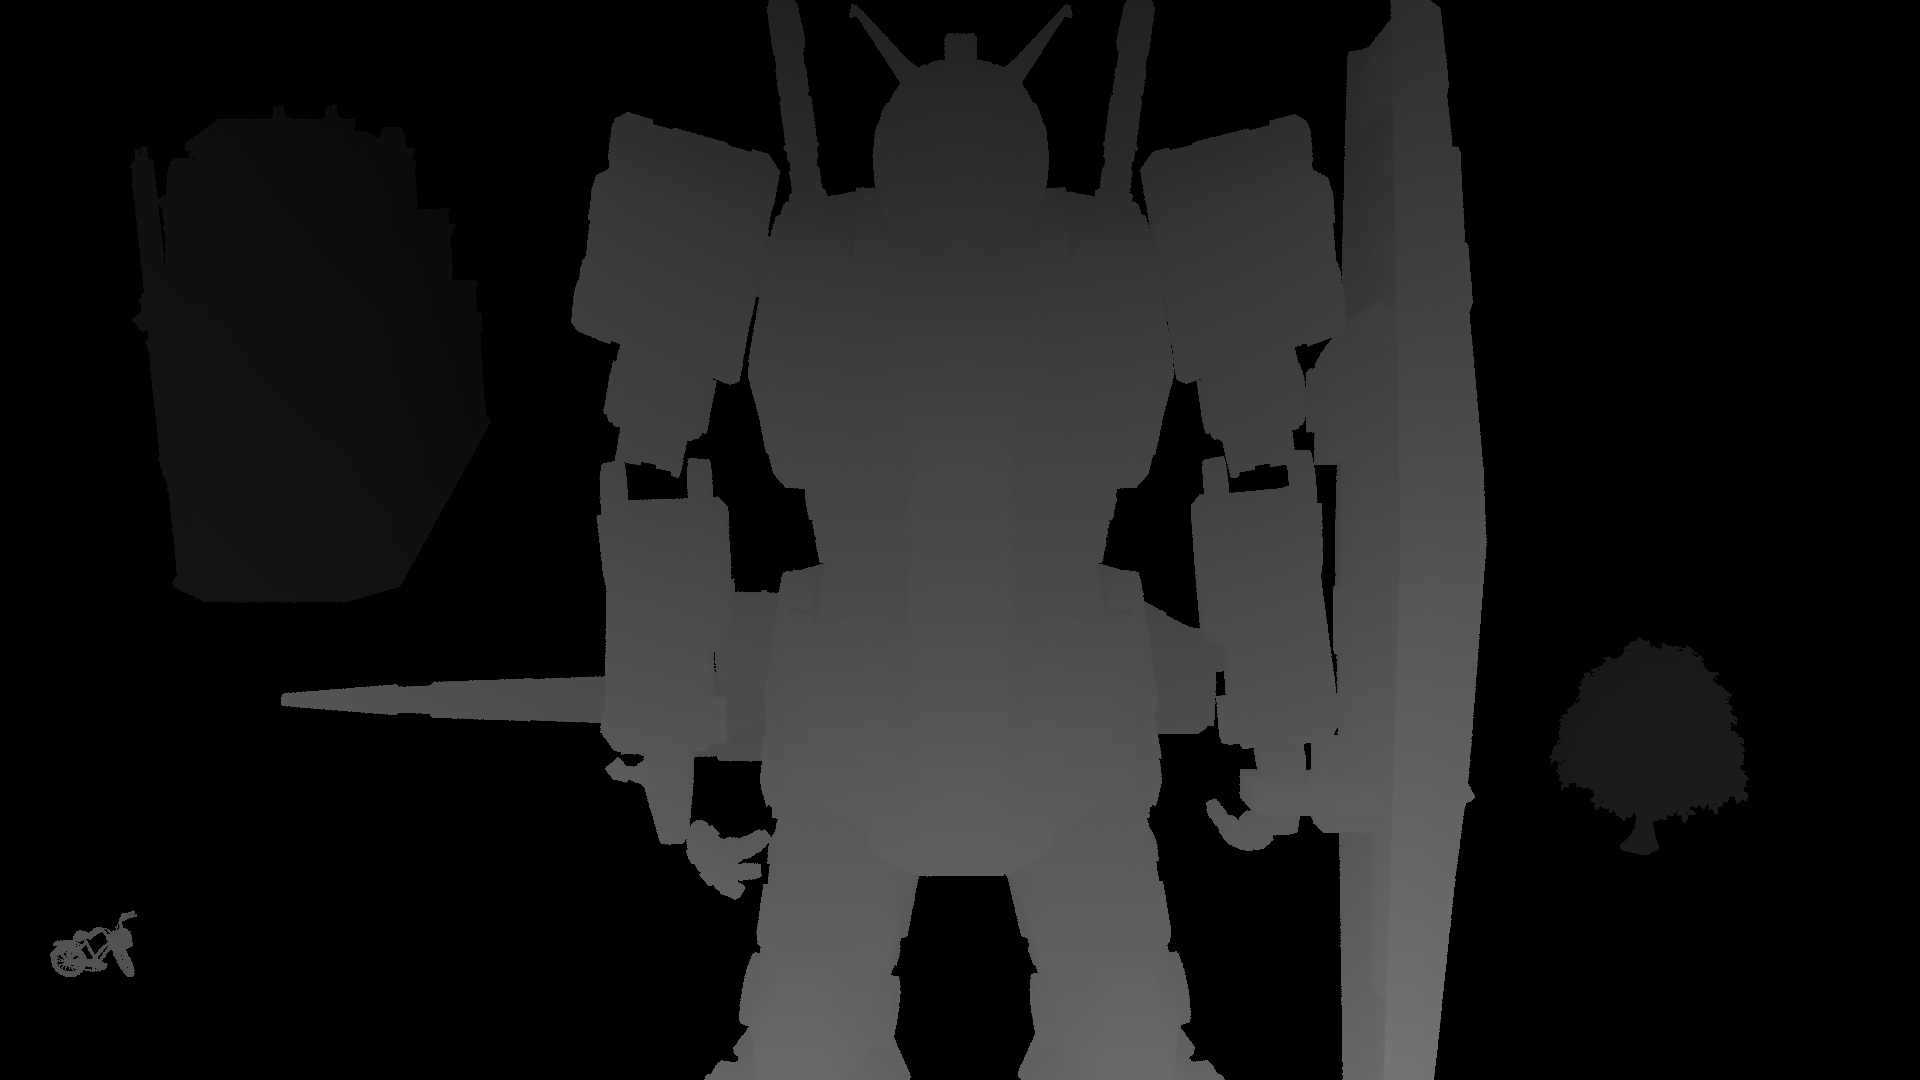

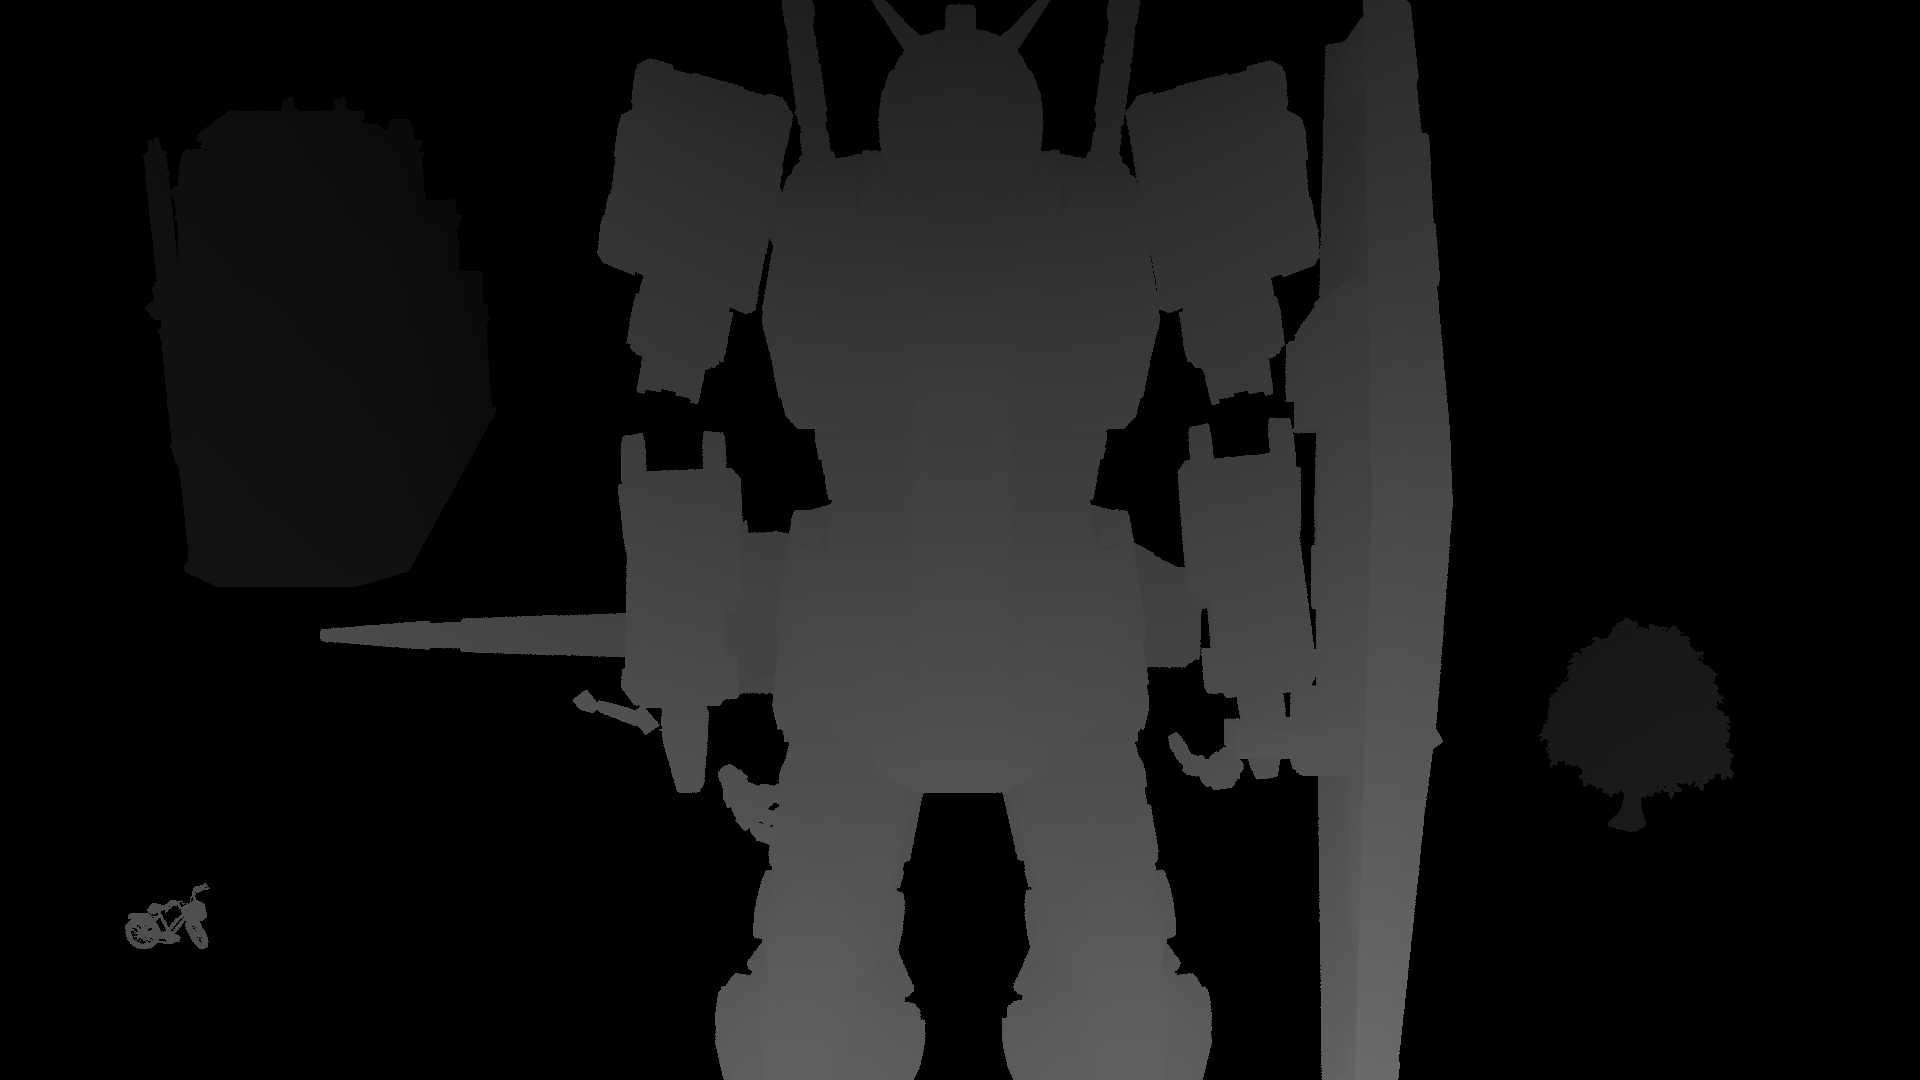

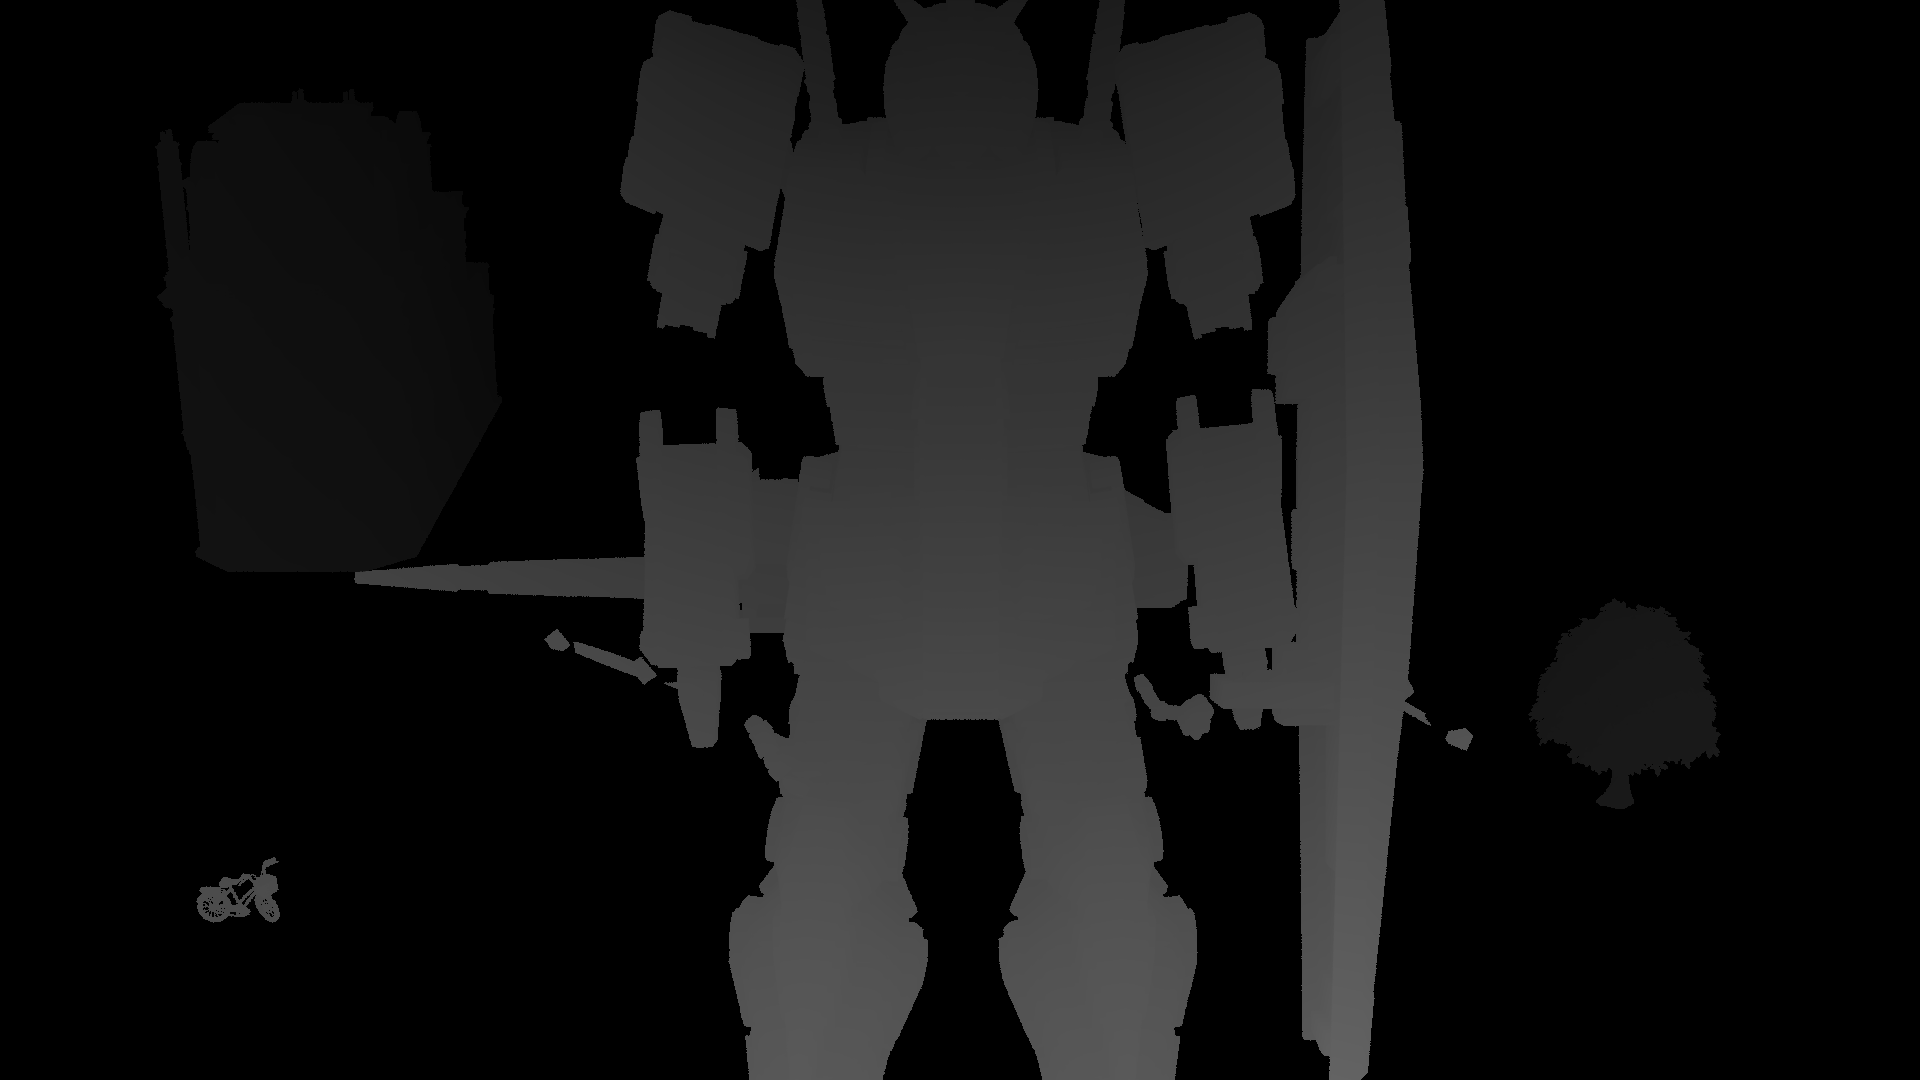

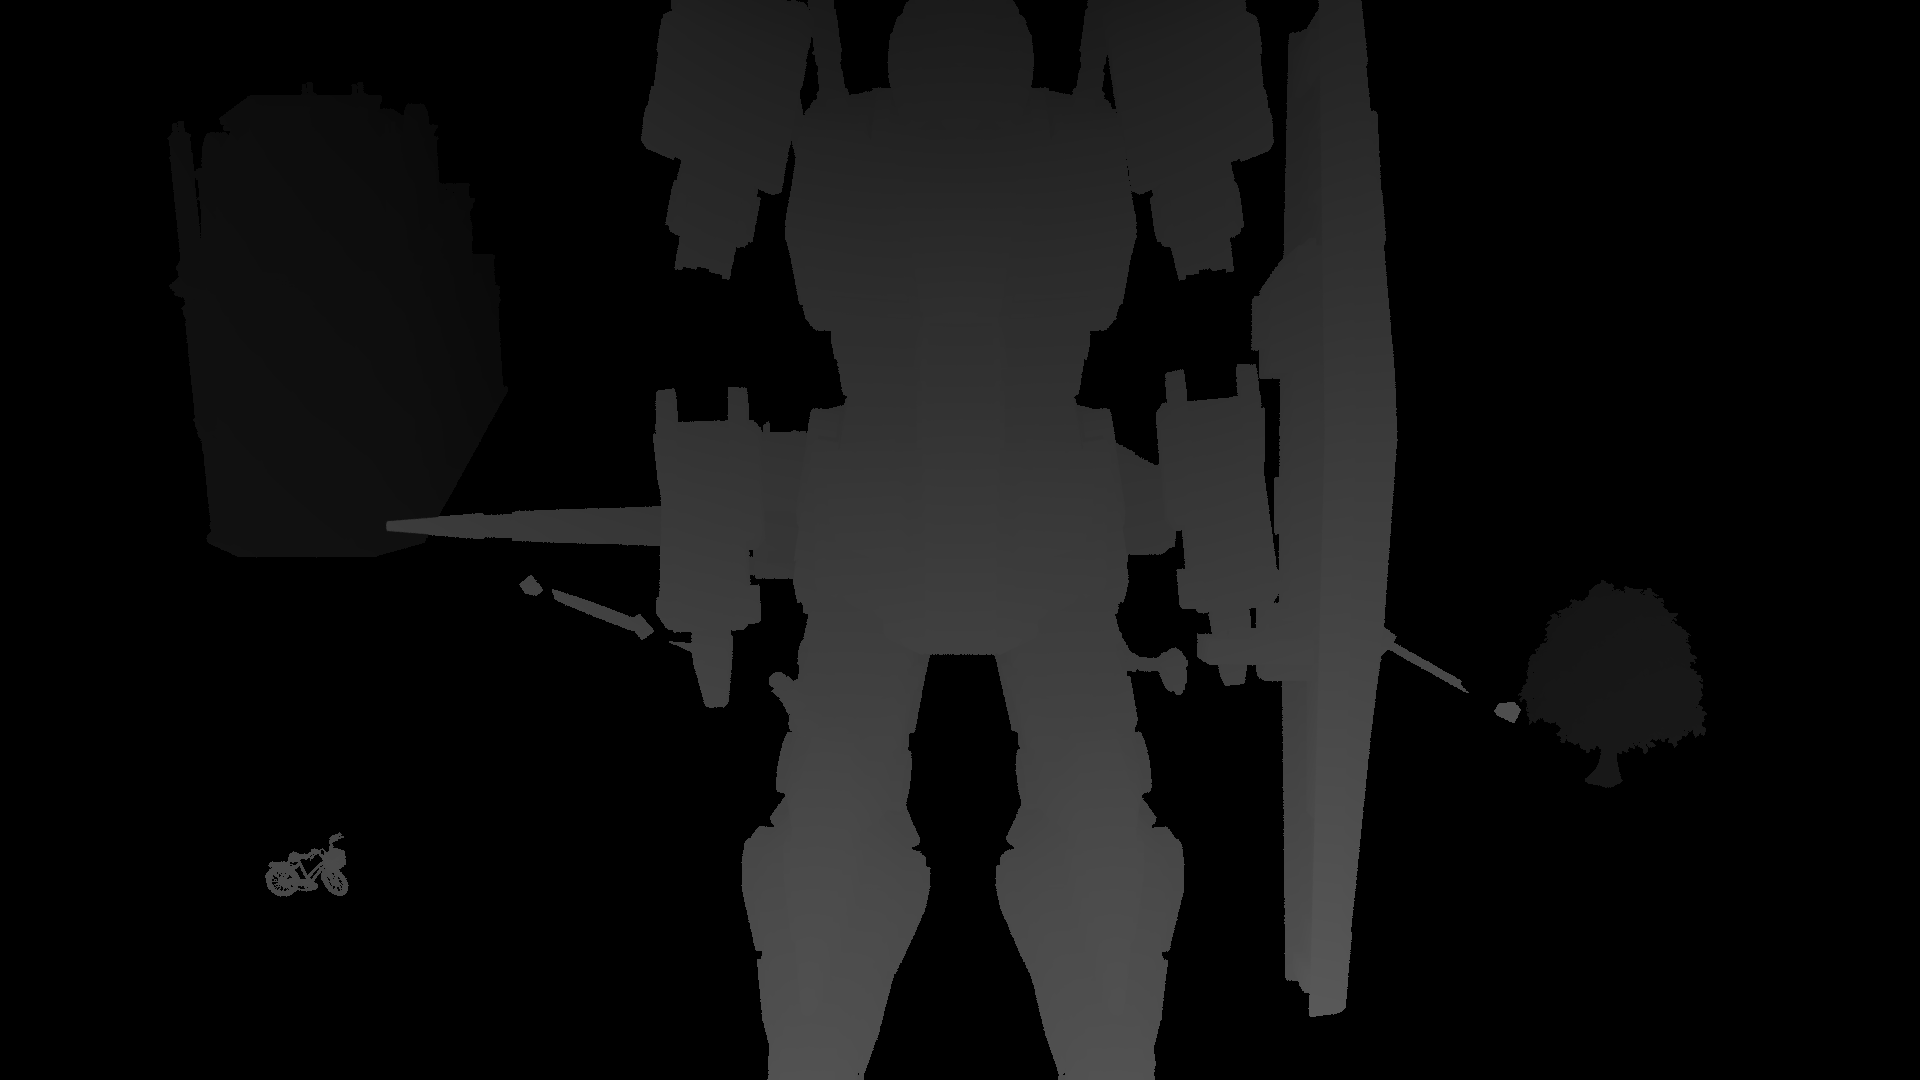

In [29]:
#(magnitude (absolute offset))
cv2_imshow(mag0)
cv2_imshow(mag1)
cv2_imshow(mag2)
cv2_imshow(mag3)
cv2_imshow(mag4)
cv2_imshow(mag5)

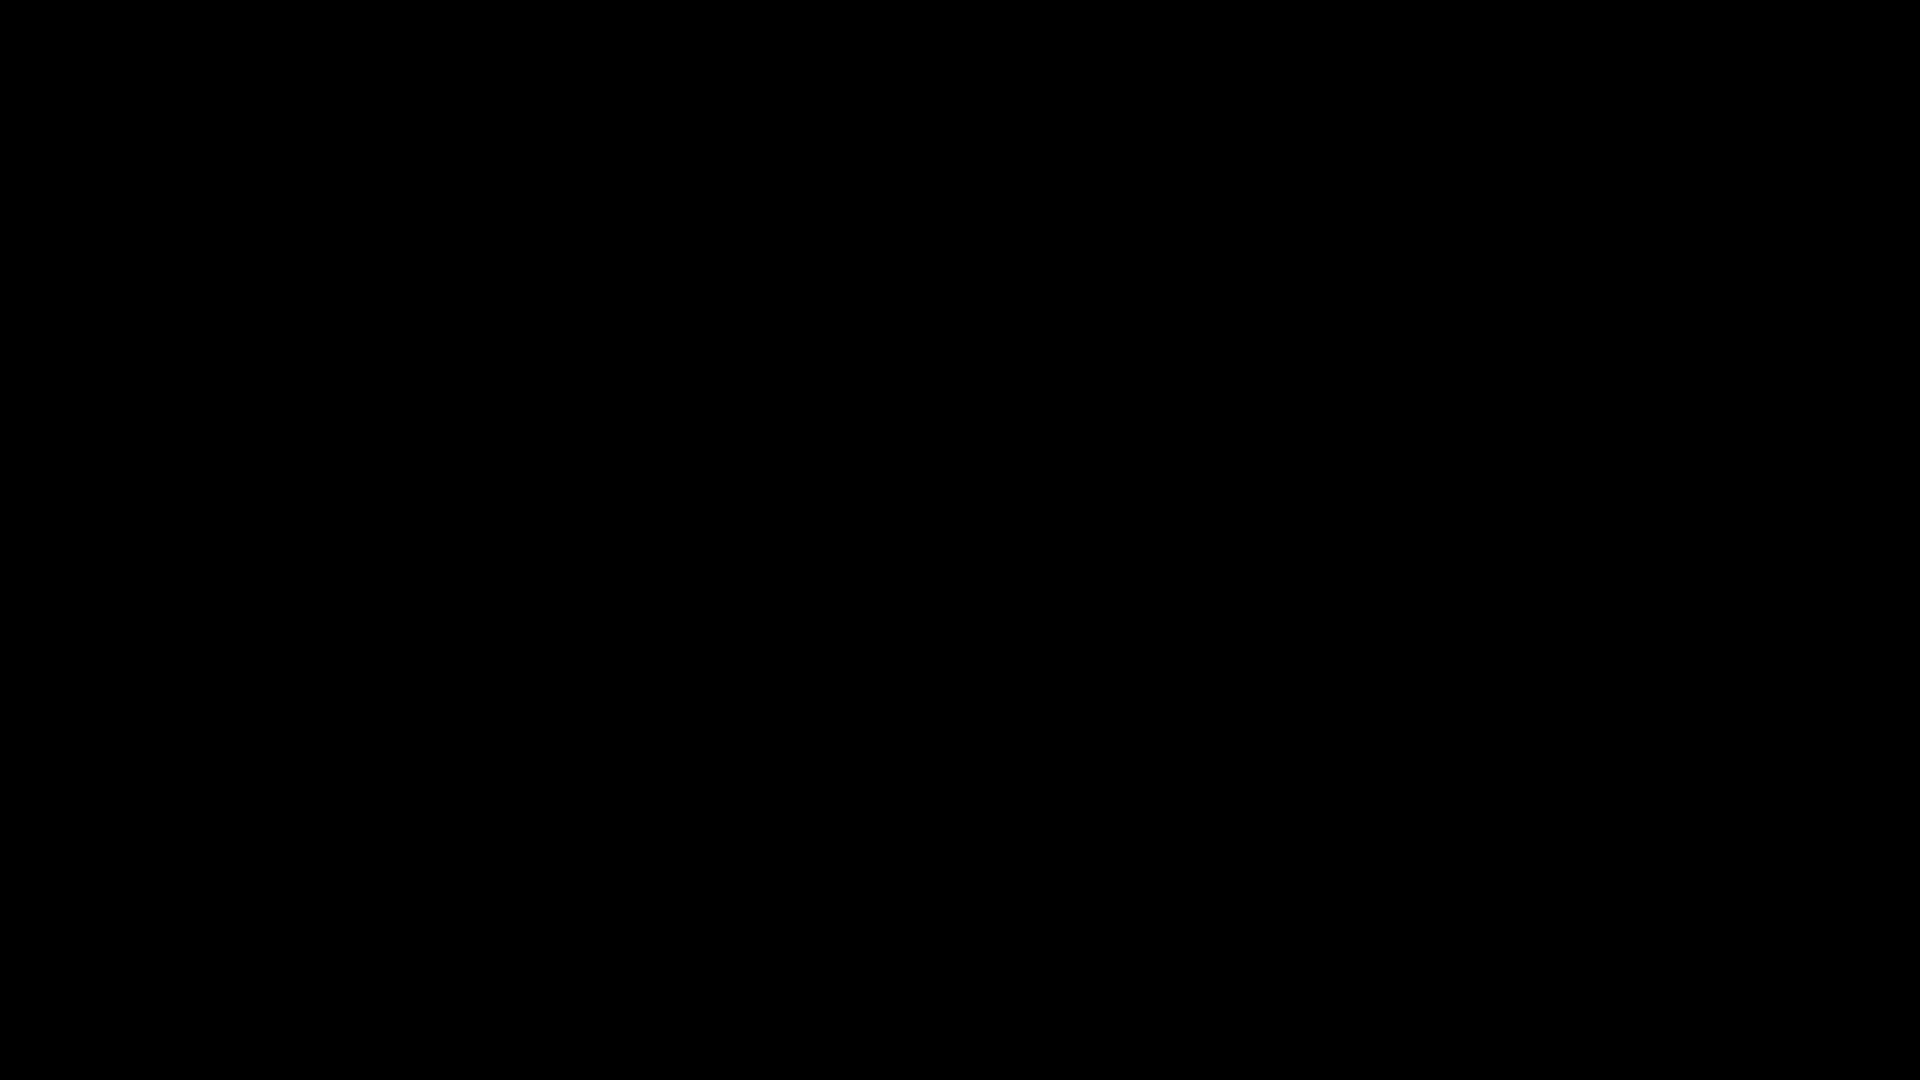

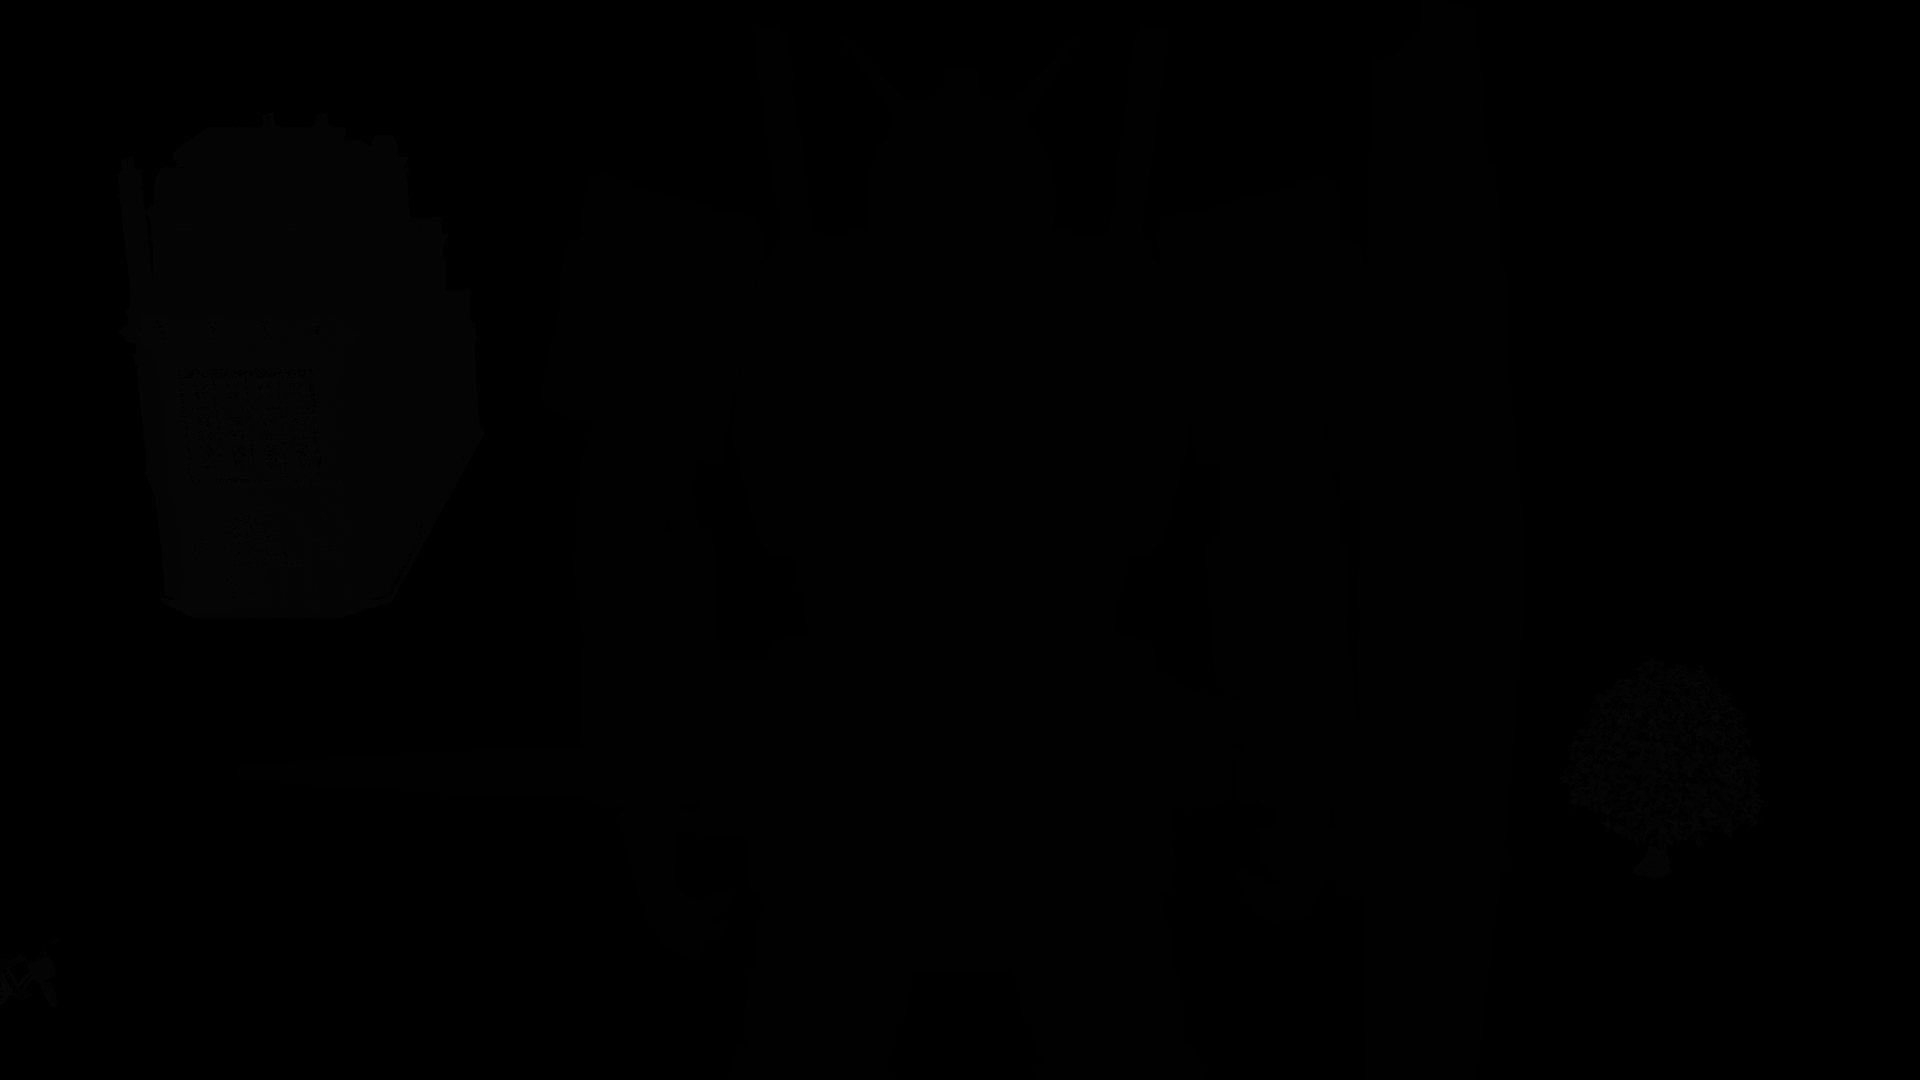

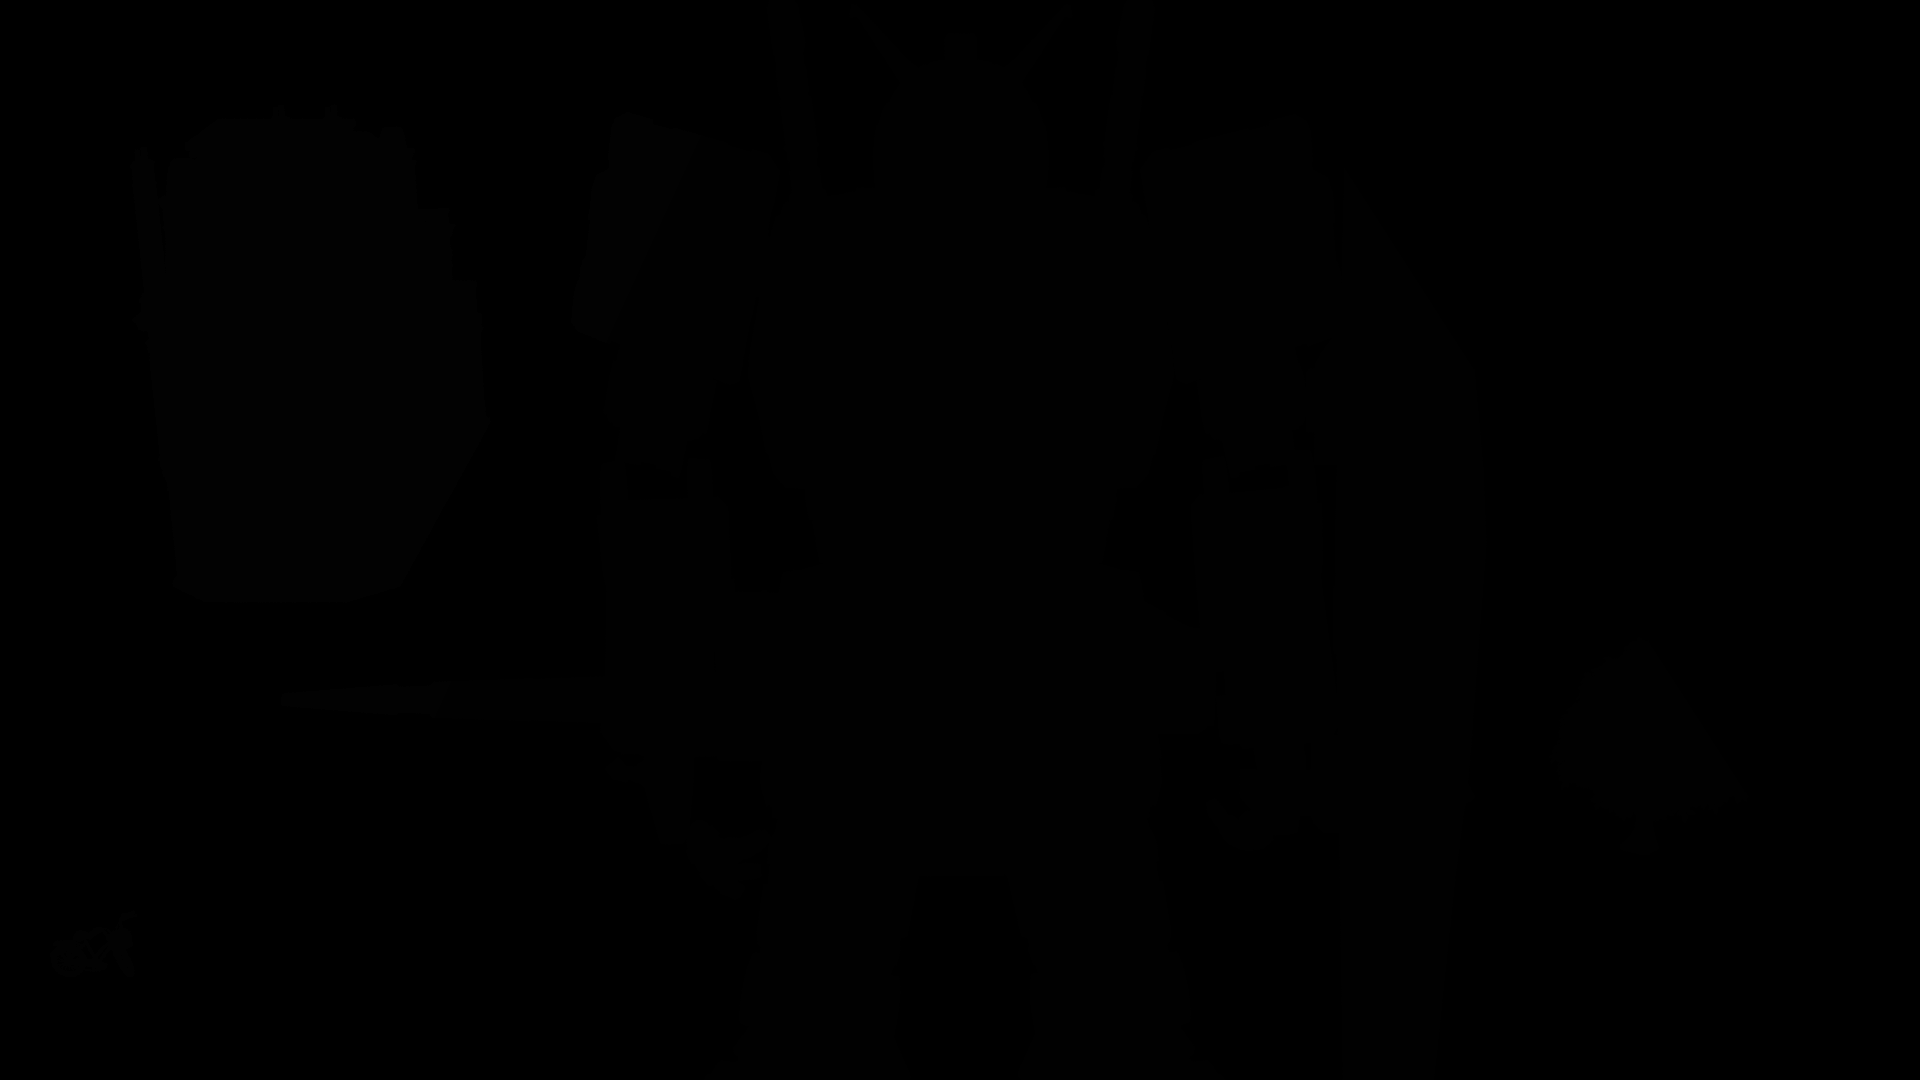

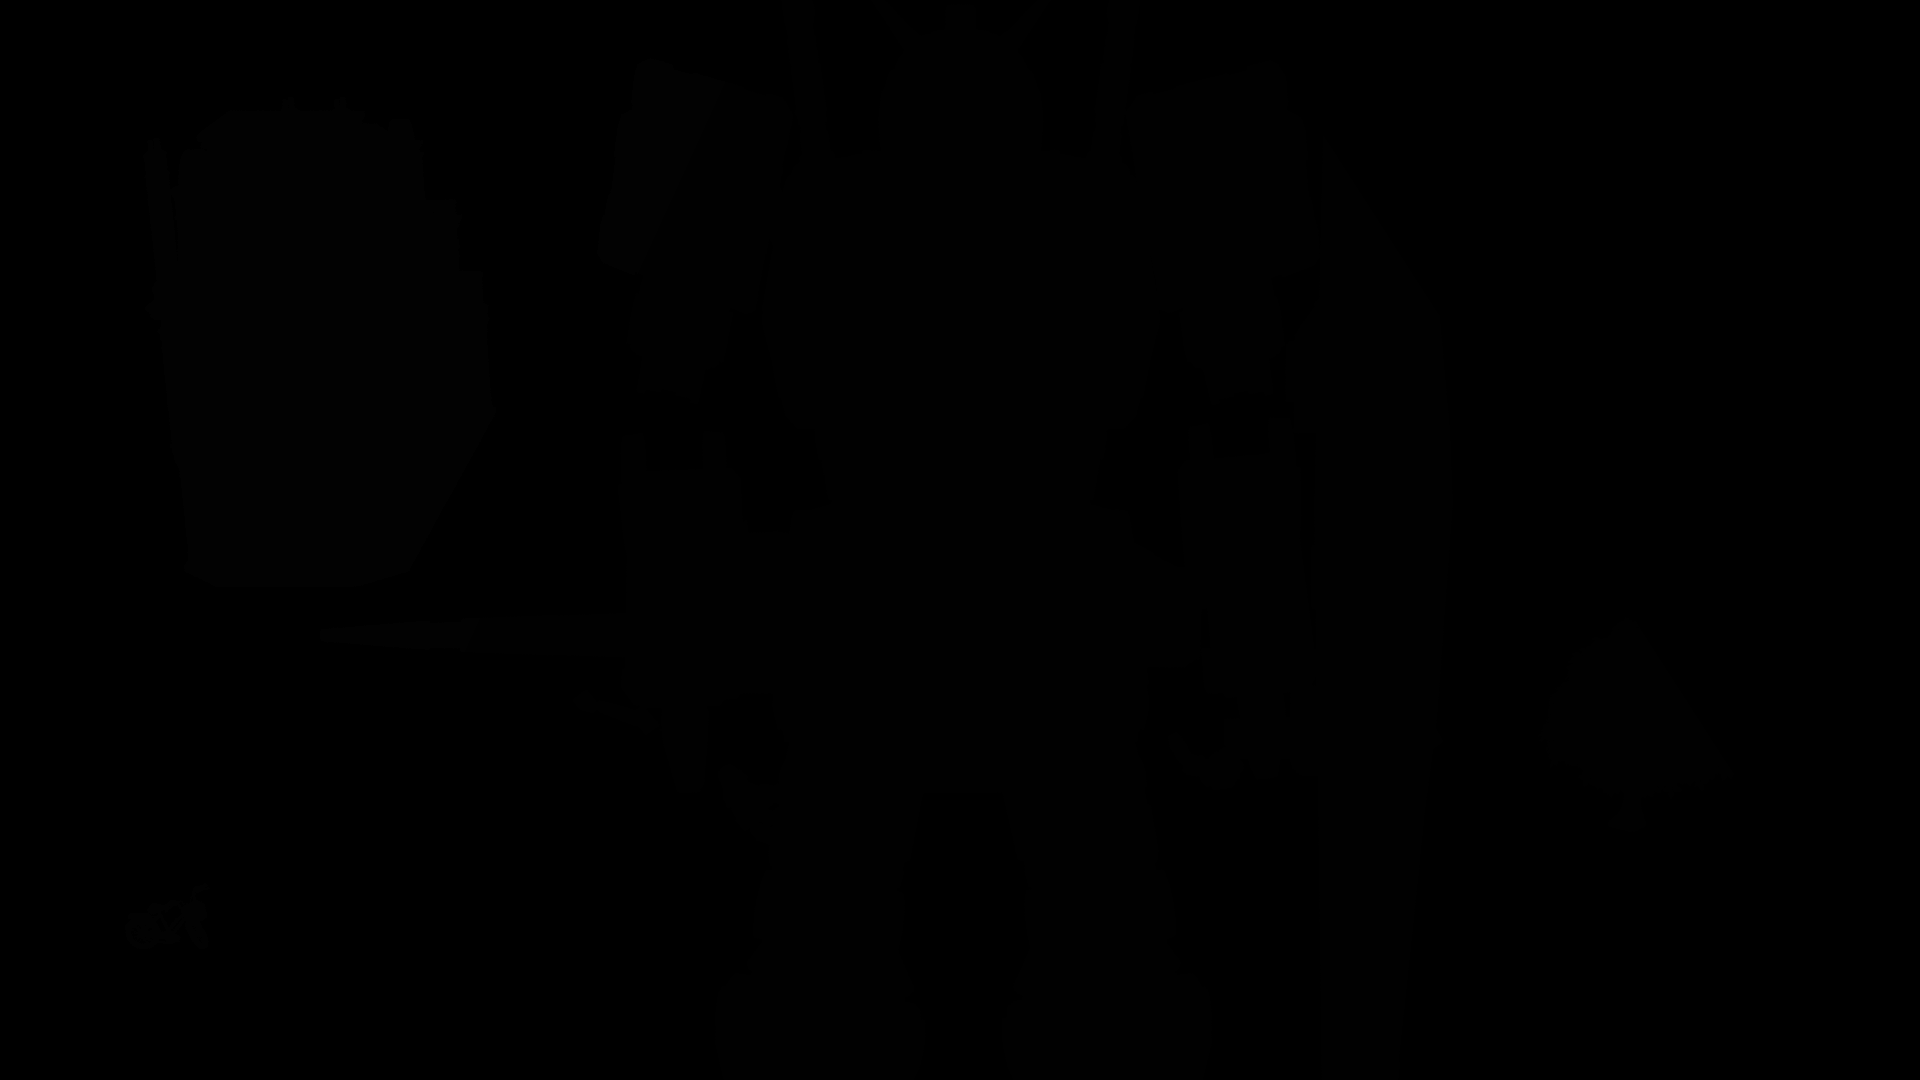

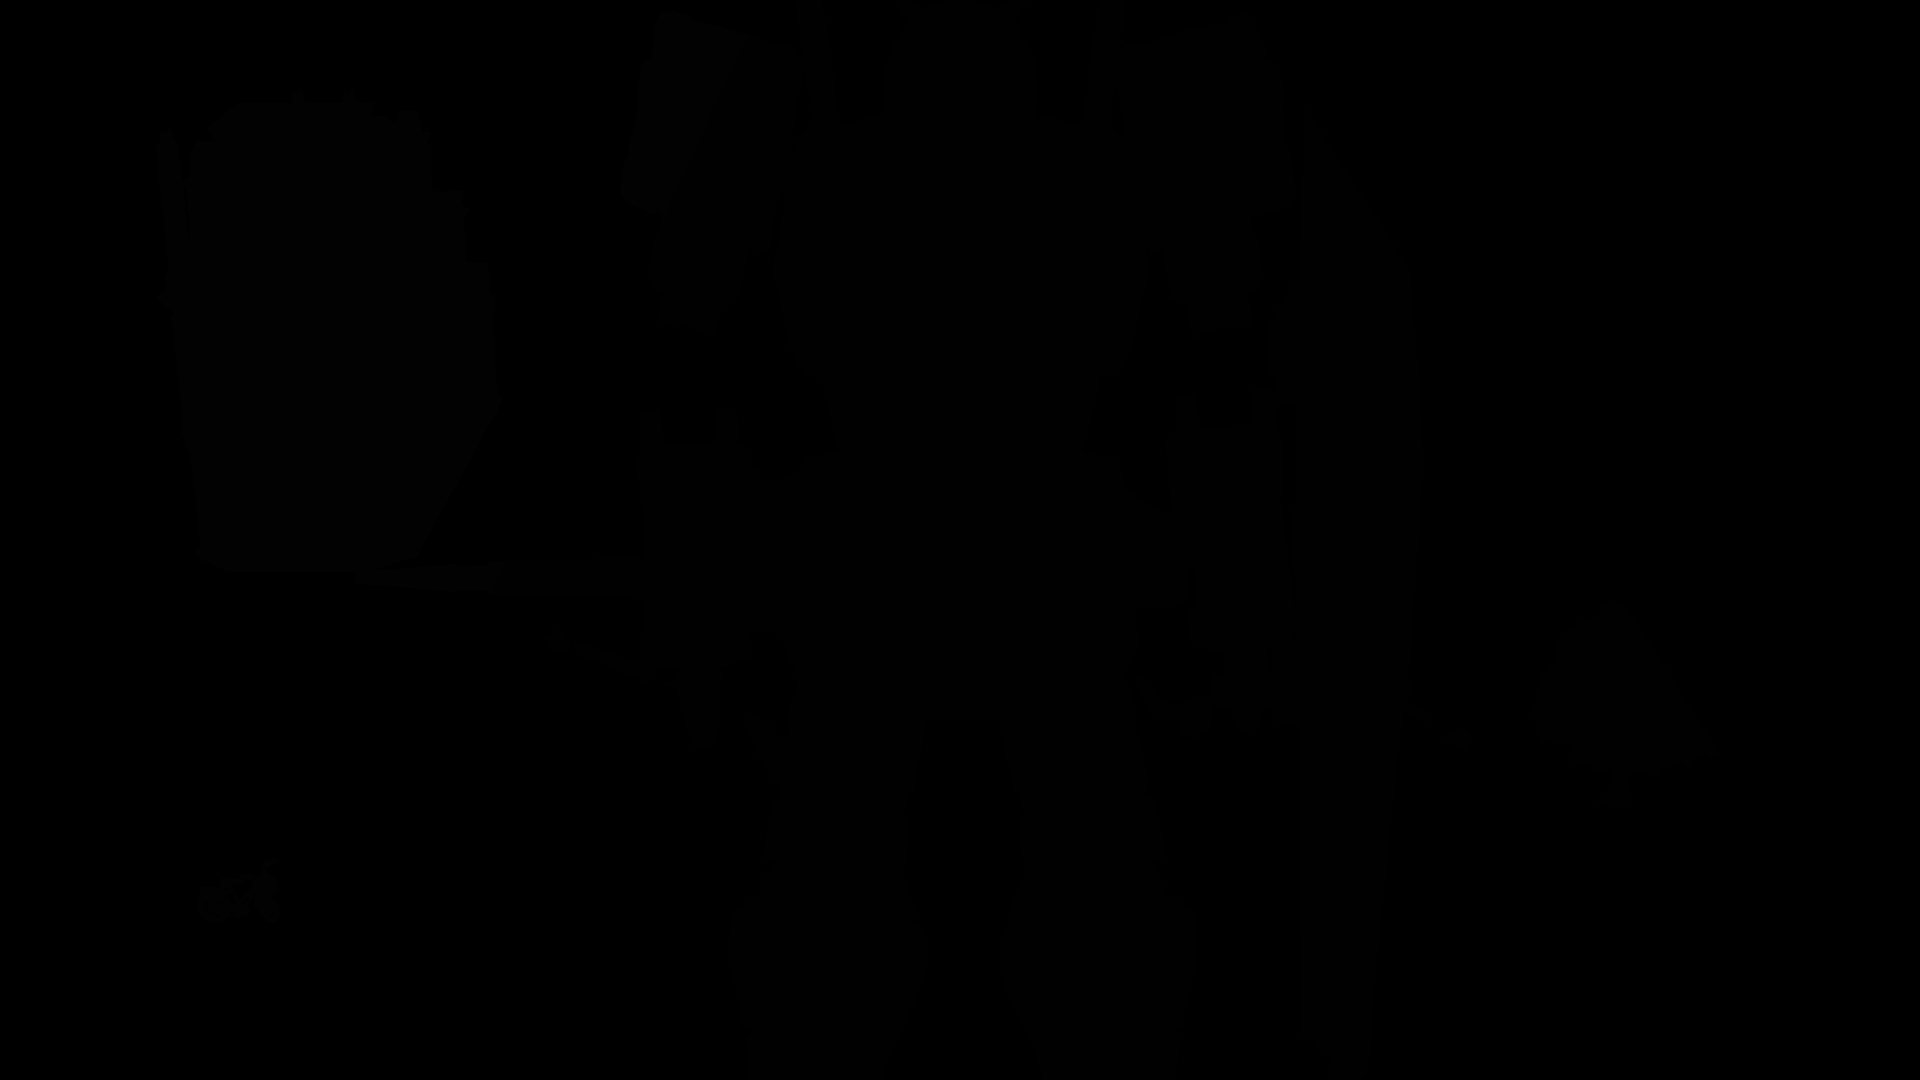

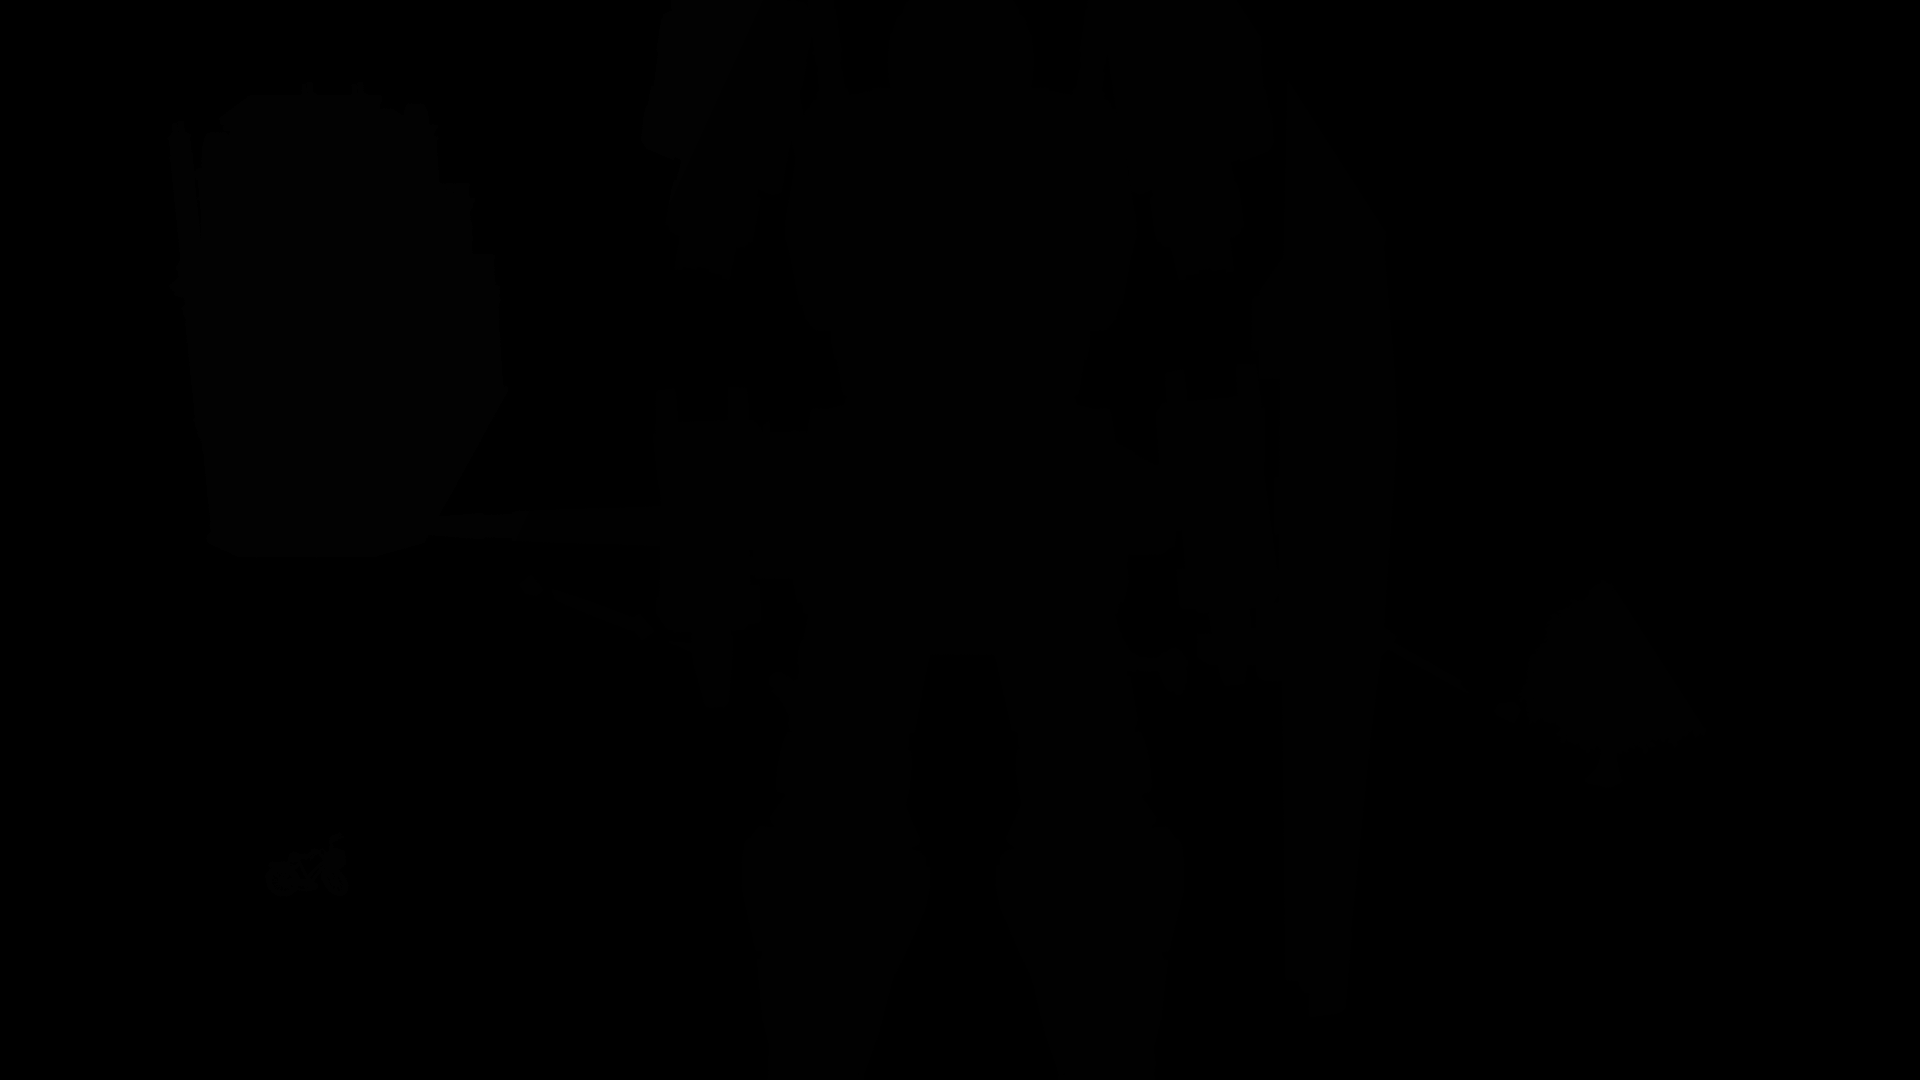

In [30]:
#(according angles for each pixels)
cv2_imshow(ang0)
cv2_imshow(ang1)
cv2_imshow(ang2)
cv2_imshow(ang3)
cv2_imshow(ang4)
cv2_imshow(ang5)

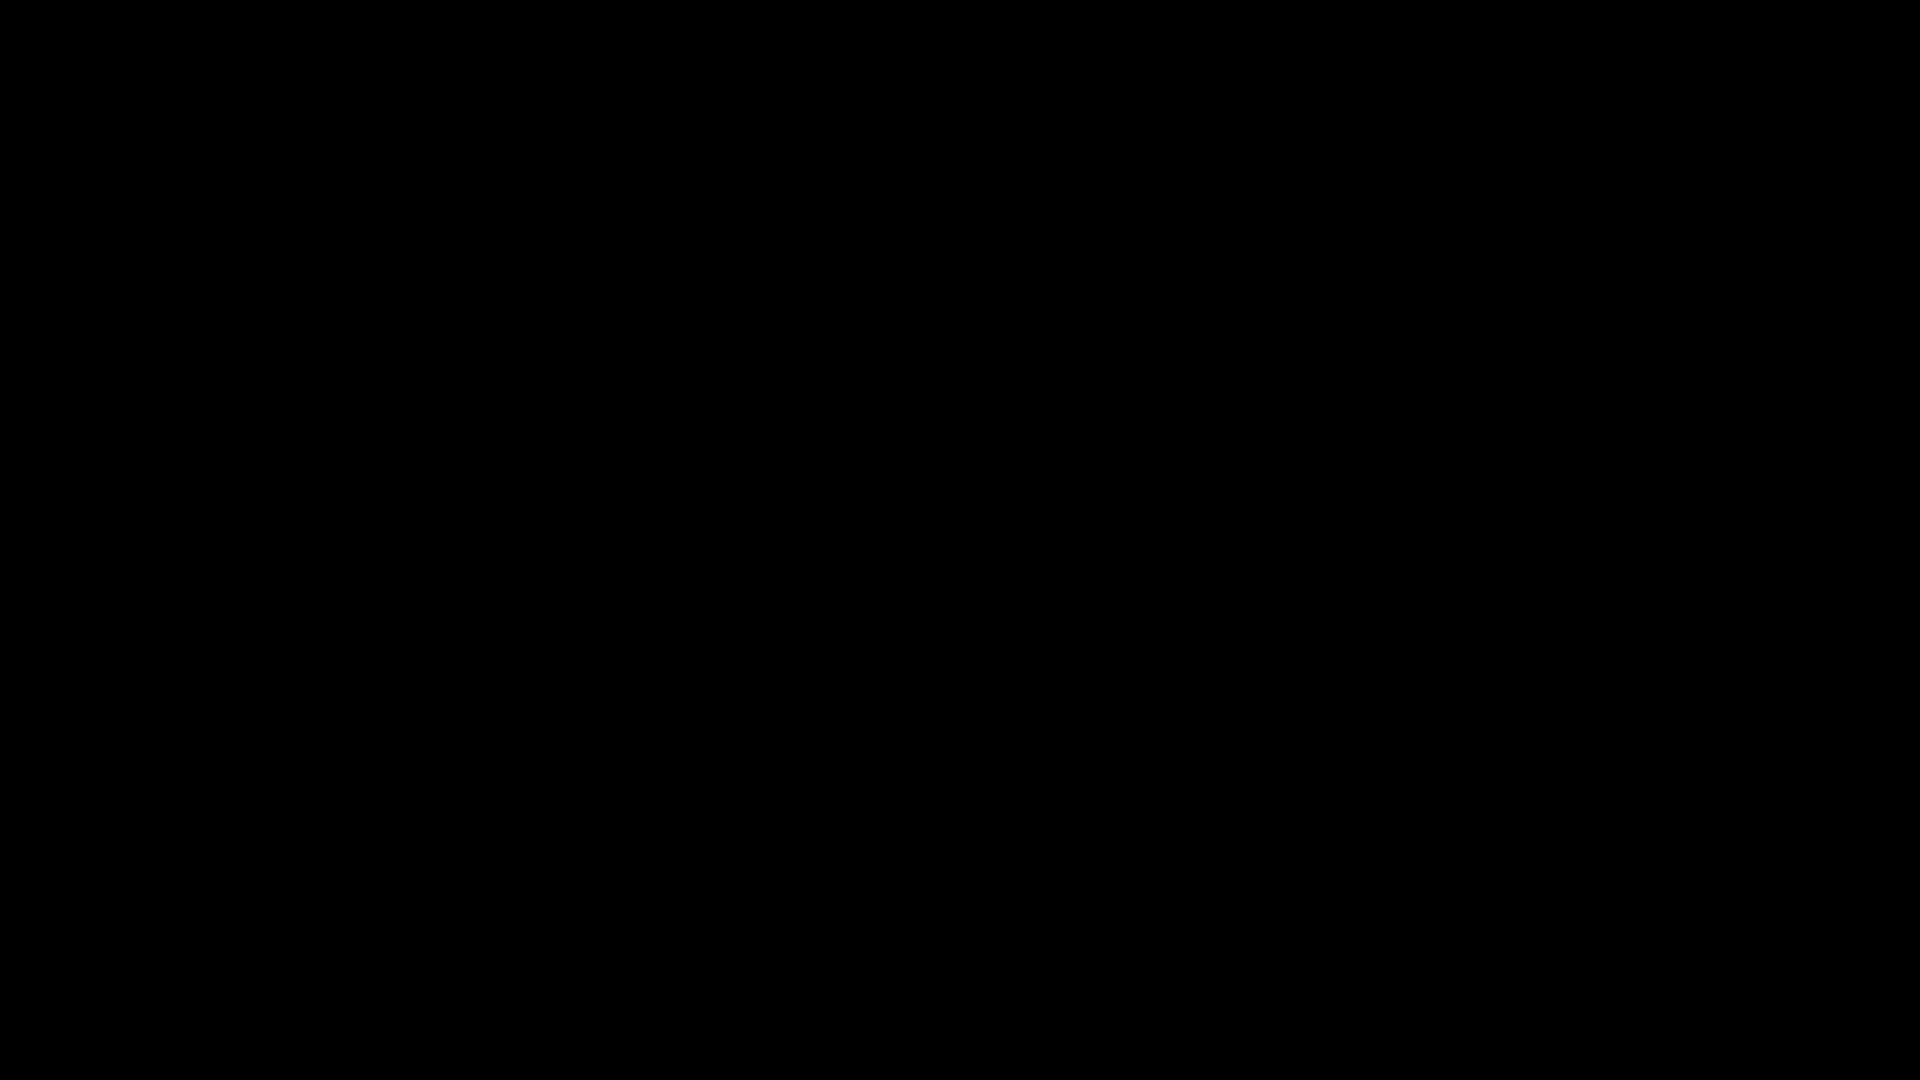

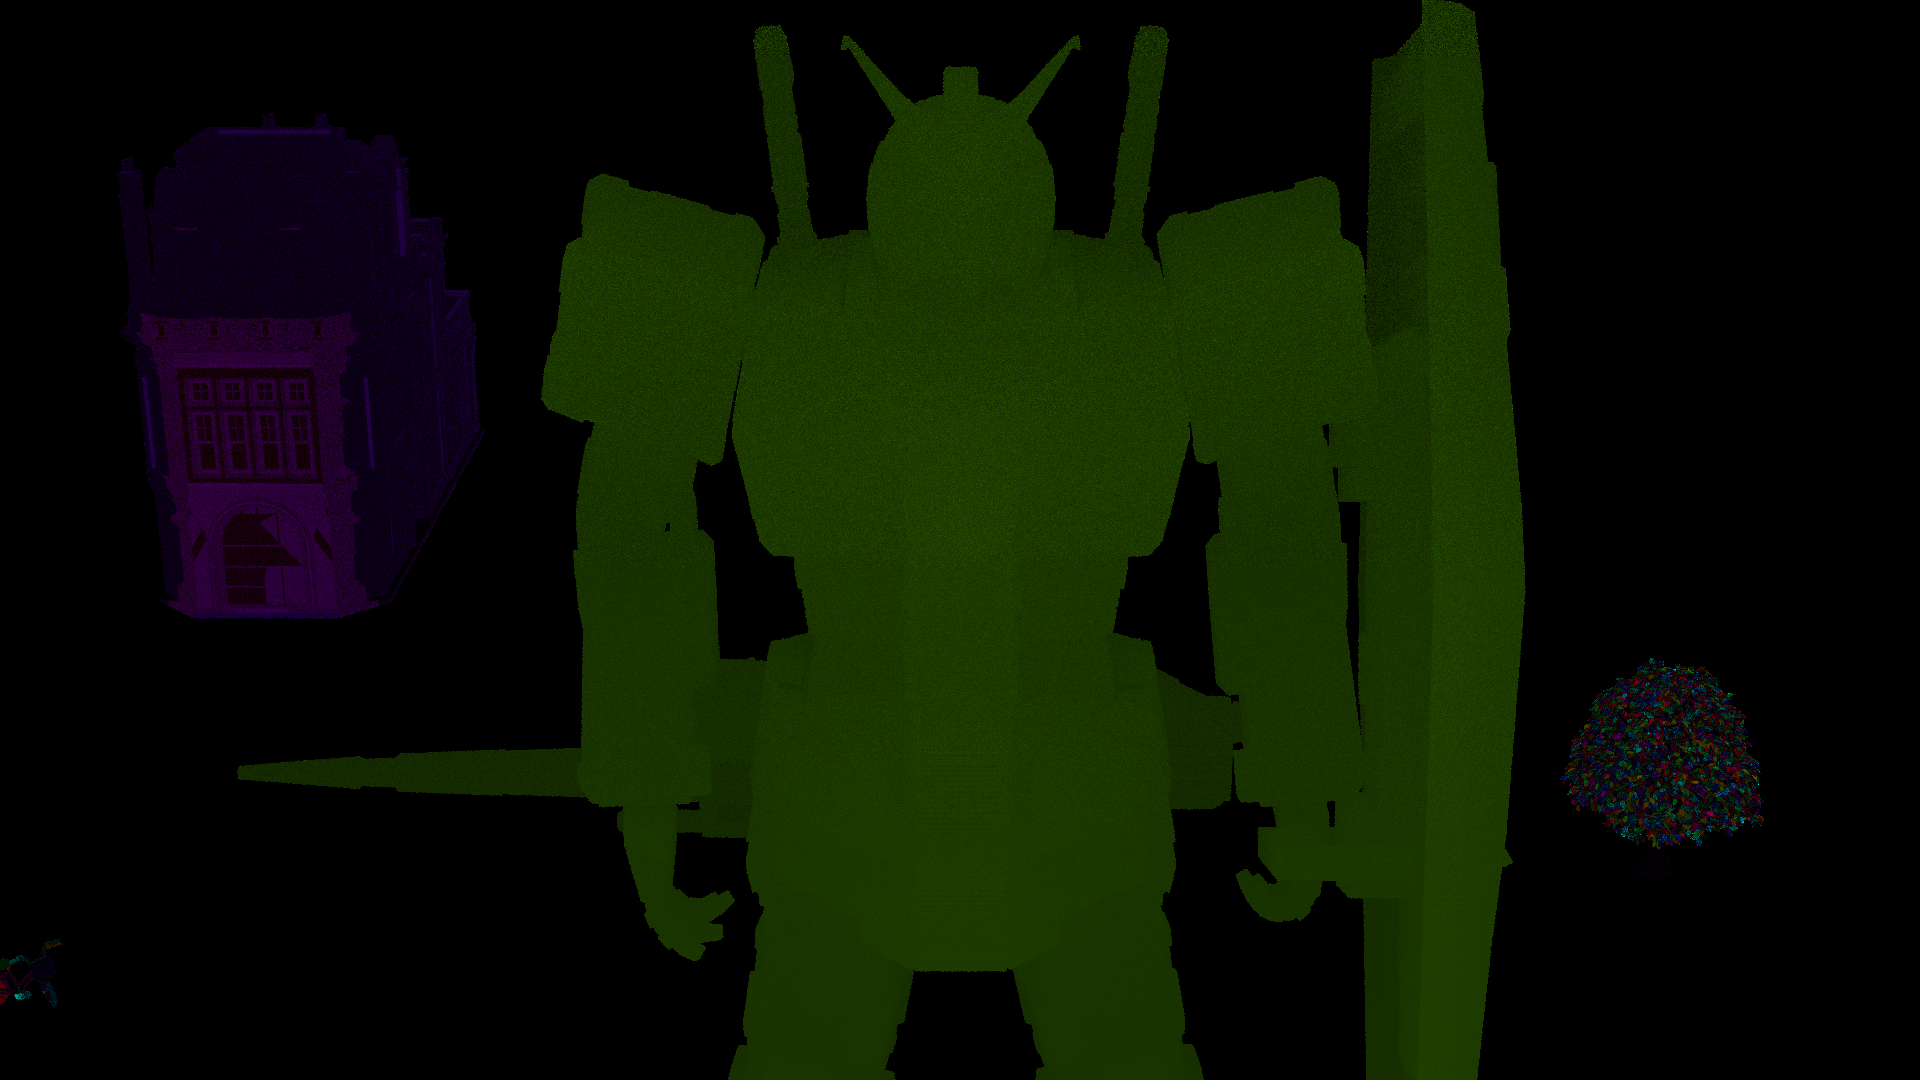

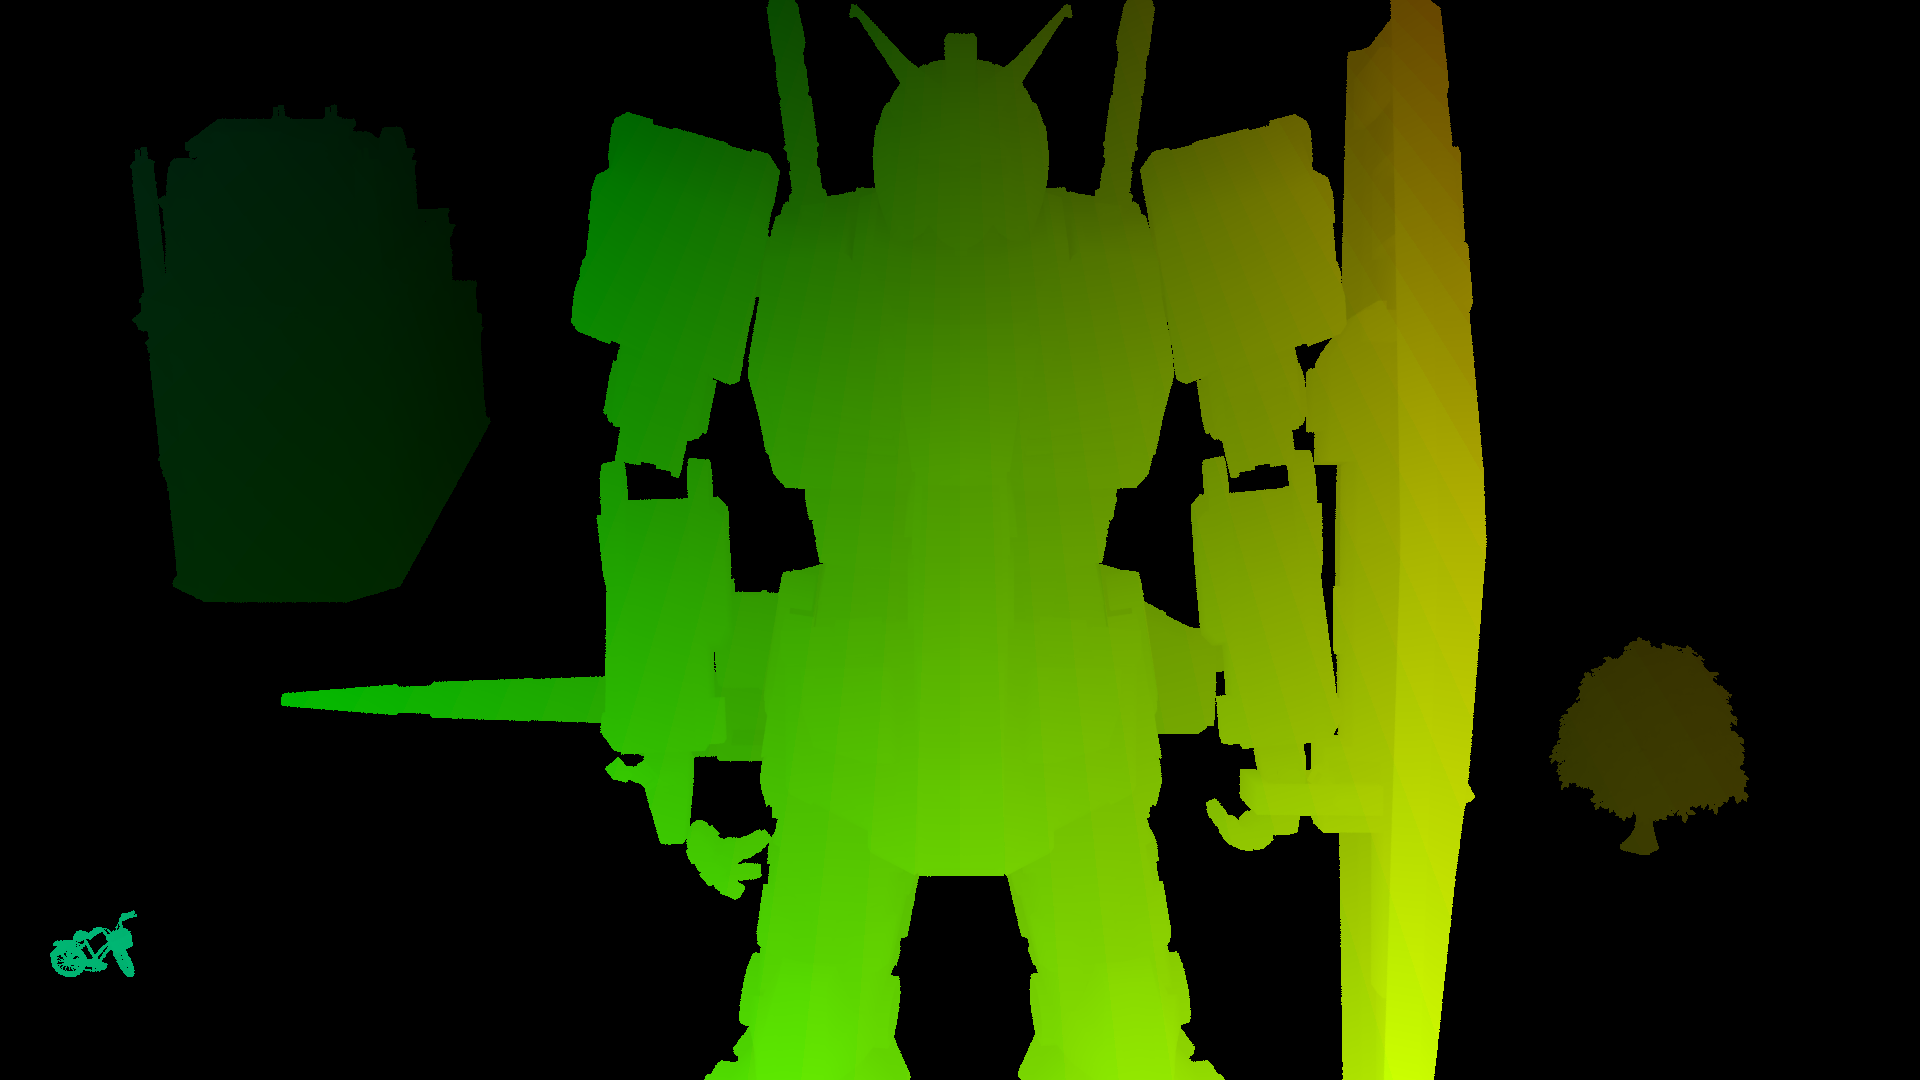

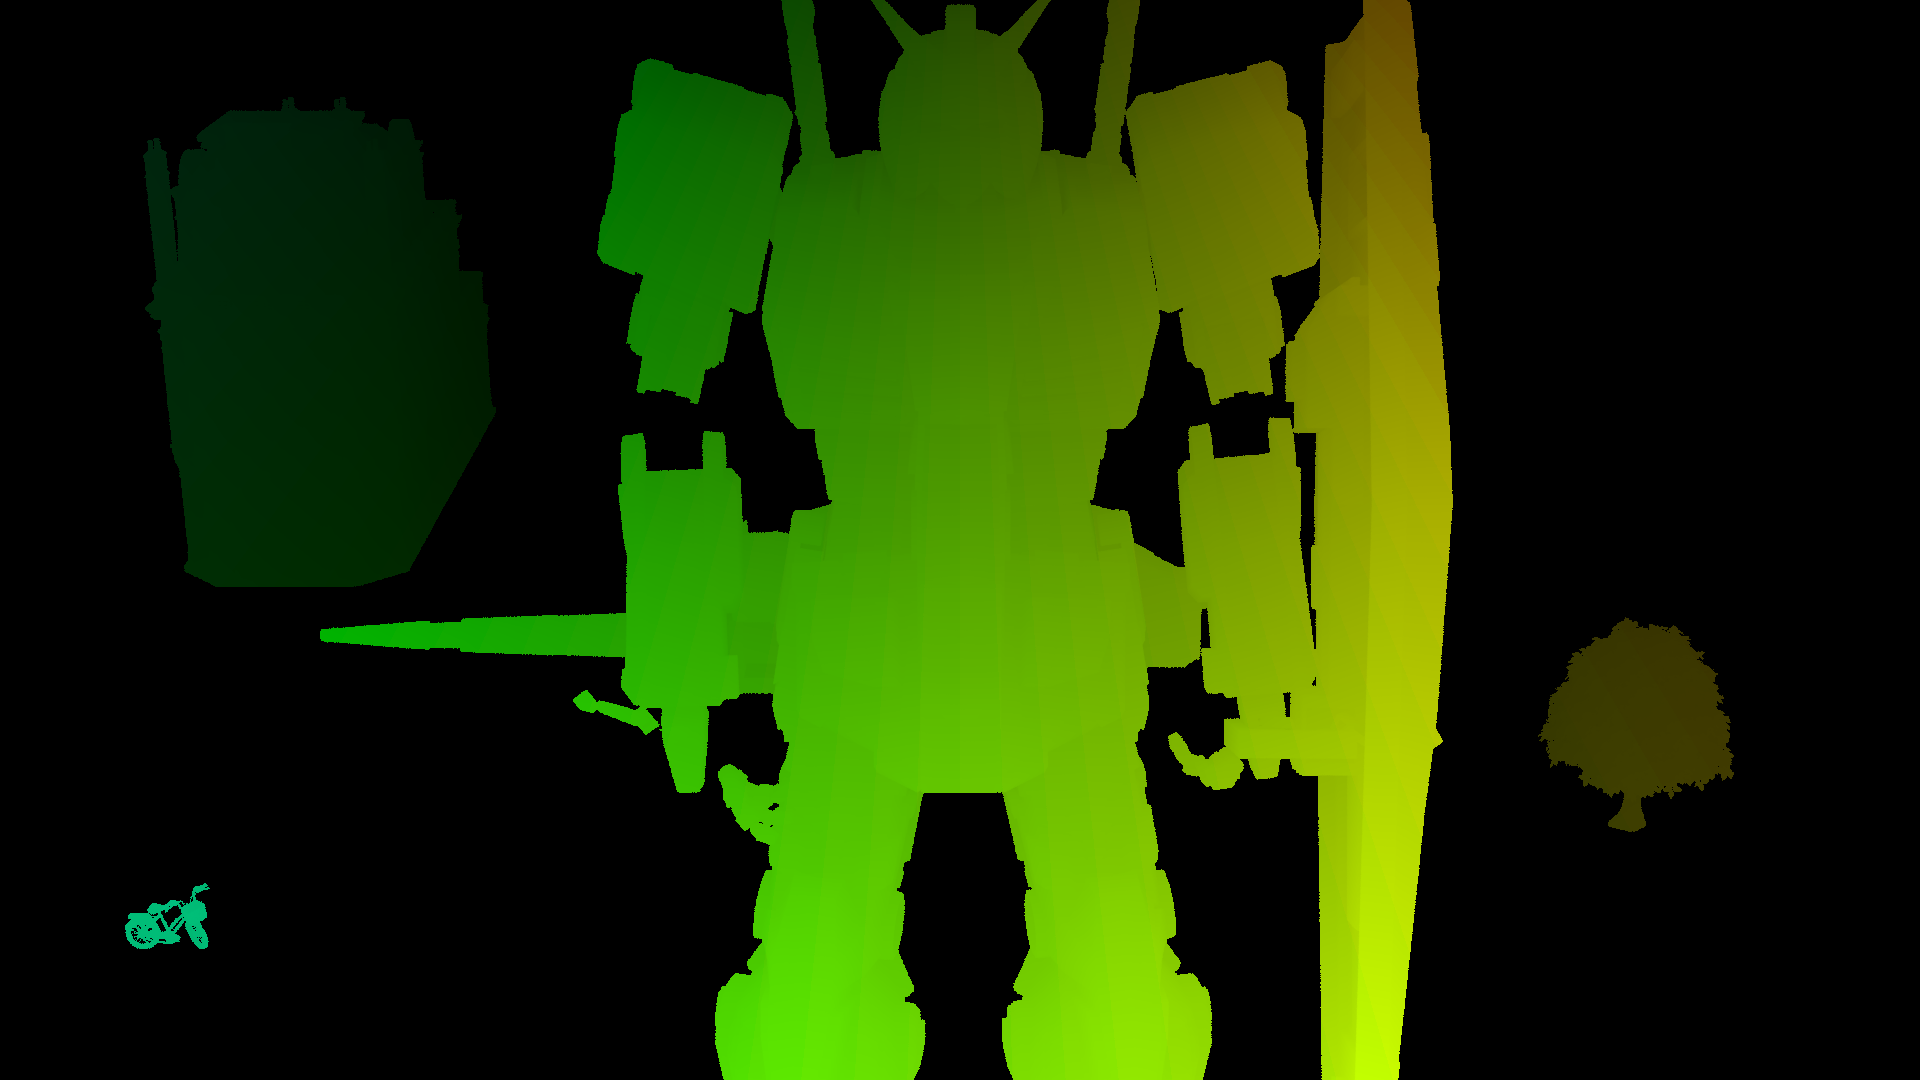

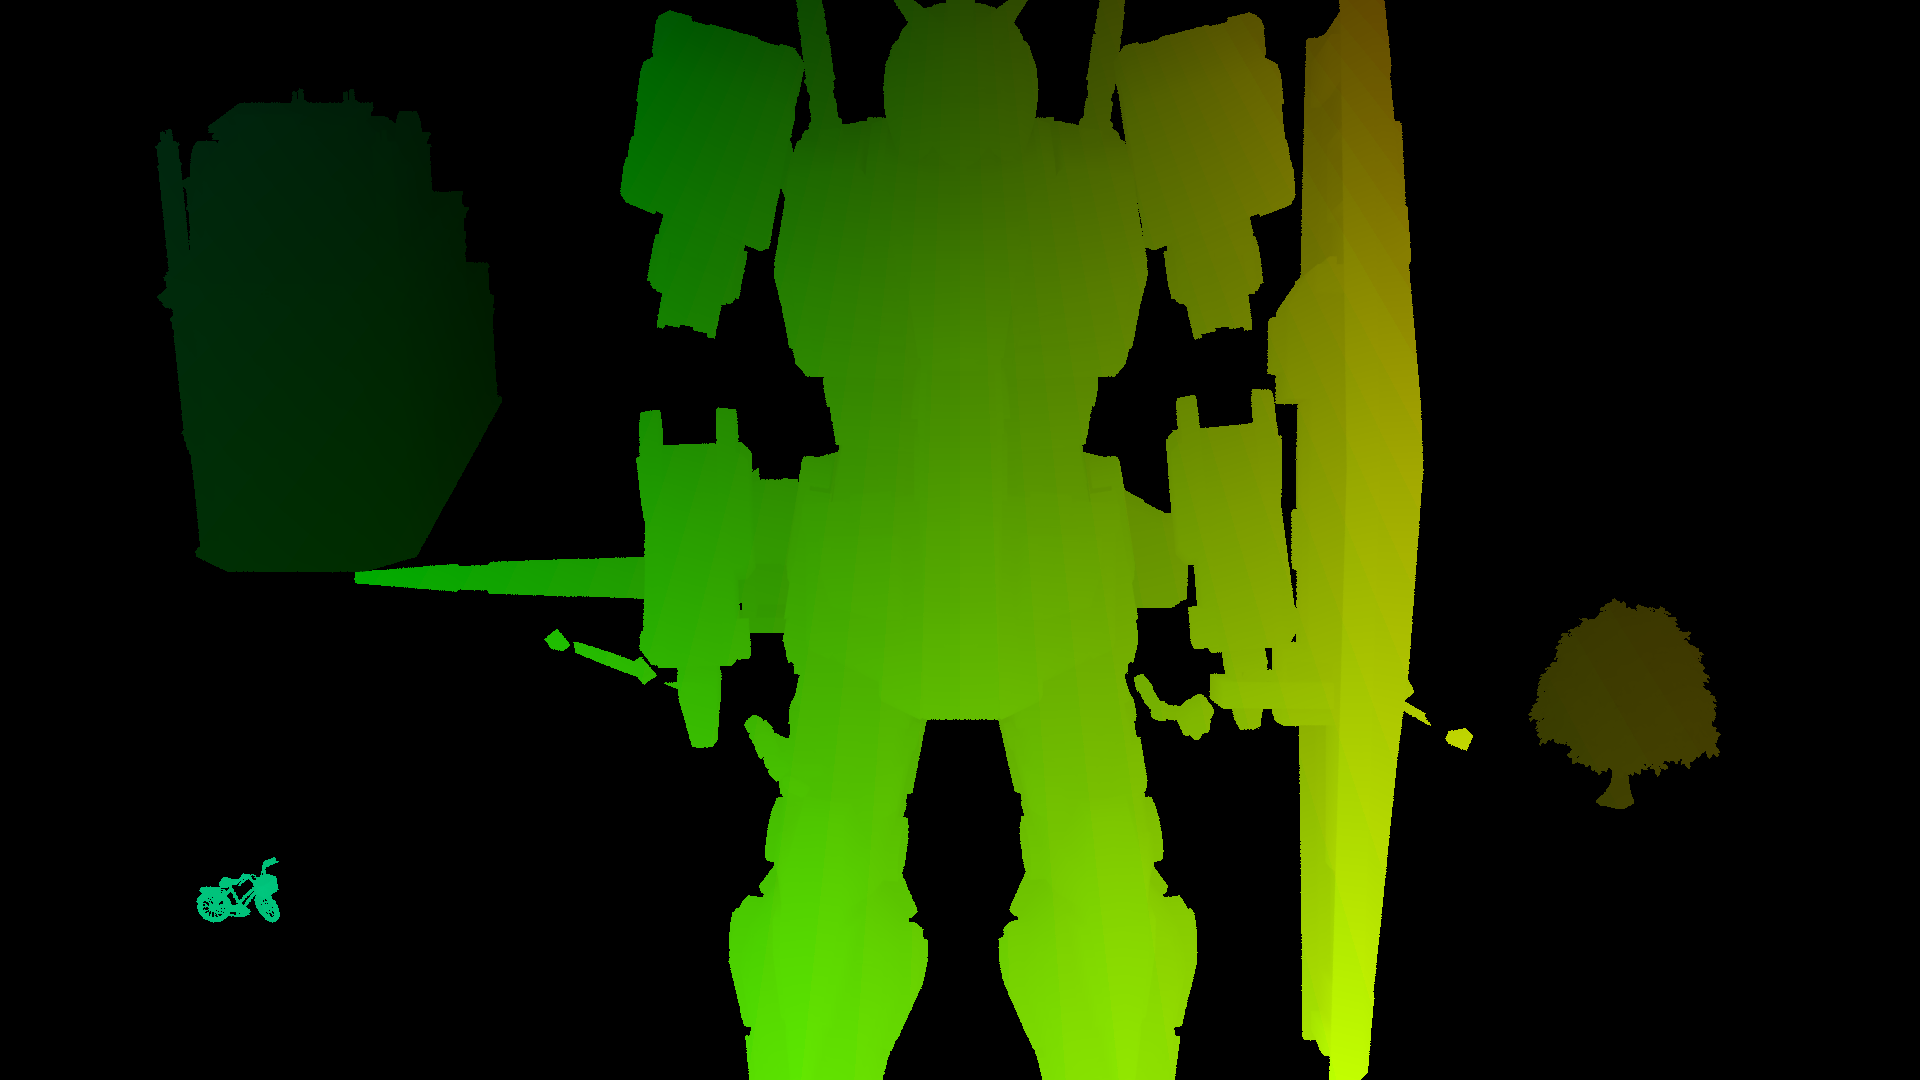

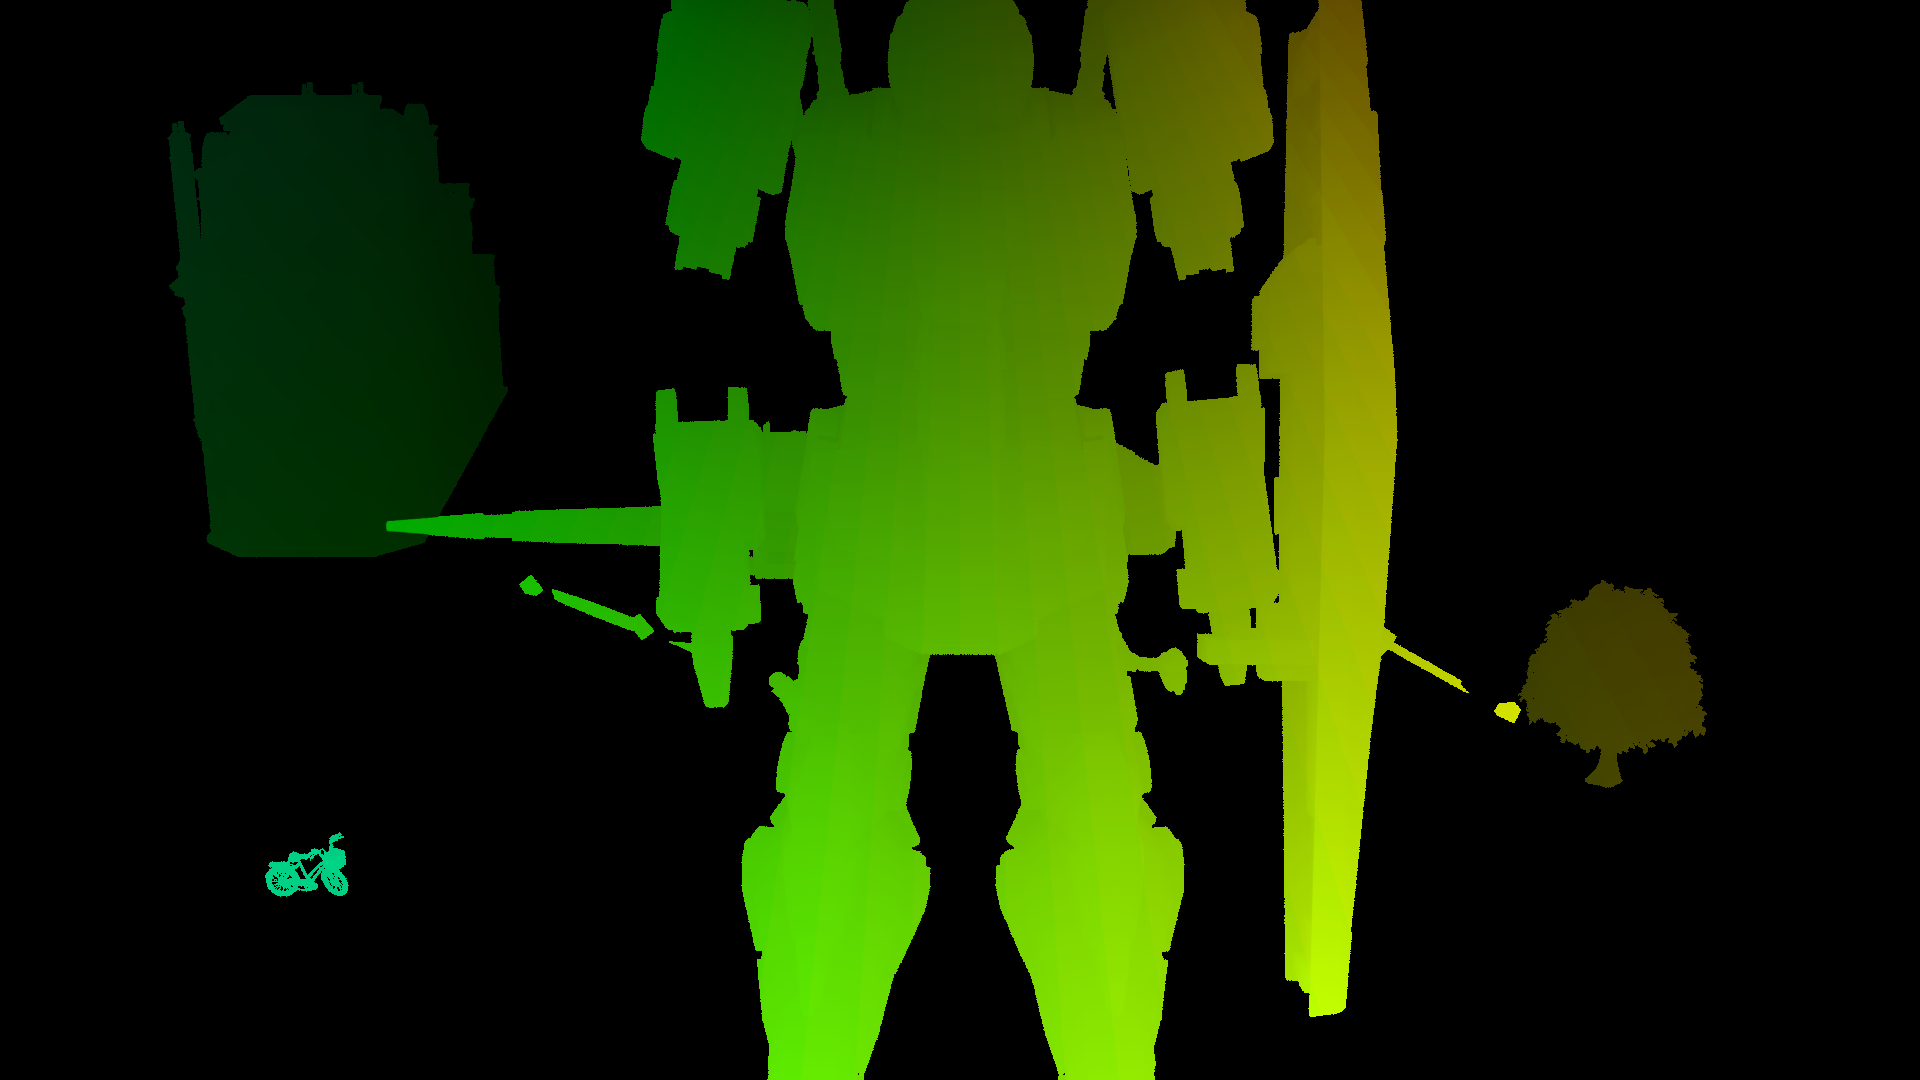

In [28]:
#nice-looking color-image (using the HSV (hue, saturation, value) colorspace, setting the hue to the angle, saturation to full, and the value to the magnitude)
cv2_imshow(bgr0)
cv2_imshow(bgr1)
cv2_imshow(bgr2)
cv2_imshow(bgr3)
cv2_imshow(bgr4)
cv2_imshow(bgr5)

In [ ]:
#SOURCE: http://www.tobias-weis.de/groundtruth-data-for-computer-vision-with-blender/